#Gradient Descent

([Gradient Descent](https://medium.com/geekculture/machine-learning-fundamentals-cost-function-and-gradient-descent-904234019ef9), Medium)

Gradient descent is een optimalisatiemethode die wordt gebruikt om machine learning-modellen te verbeteren door de cost in voorspellingen te minimaliseren. Het maakt gebruik van cost functies om de parameters, zoals gewichten en biases, van het model aan te passen. Wanneer de cost functie een laag niveau bereikt, weten we dat de parameterwaarden, inclusief de gewichten en biases, geoptimaliseerd zijn voor het model.

Gradient descent is essentieel omdat de cost function in een neuraal netwerk kunnen veranderen van convex naar niet-convex, wat problemen oplevert bij het optimaliseren van de parameters. Hier lees je waarom gradient descent optimalisatie nodig is en hoe gradient descent werkt om de bijbehorende problemen, zoals lokale minimum en zadel punten, op te lossen.

### Probleem voorbeeld

Een voorbeeld om Gradient Descent te begrijpen, is een situatie waarin het model, weergegeven door een rode lijn, niet goed is afgestemd om nauwkeurige voorspellingen te maken omdat het niet door de datapunten gaat. Gradient Descent zorgt ervoor dat de rode lijn geleidelijk wordt bijgesteld zodat het model uiteindelijk nauwkeurig door de datapunten loopt.

In [ ]:
# Genereer fictieve gegevens voor huizenprijs (features) en bouwjaar (labels)
np.random.seed(42)
n_samples = 100
bouwjaar = np.random.randint(1, 100, n_samples)  # Features
huizenprijs = 50000 + 1000 * bouwjaar + np.random.normal(0, 10000, n_samples) # Labels

# Slope en intercept
weight = 5 #Slope
bias = 10  # y-intercept

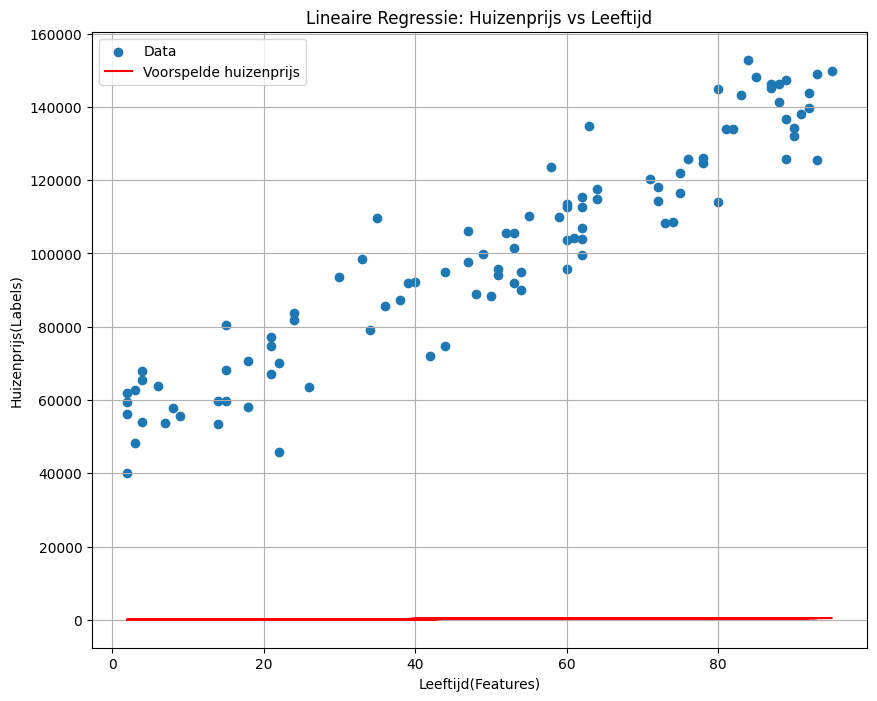

In [ ]:
# @title Initalisatie dataset en model
import numpy as np
import matplotlib.pyplot as plt

# Functie om lineaire regressie uit te voeren
def perform_linear_regression(bouwjaar, huizenprijs, weight, bias):
    y_pred = bias + weight * bouwjaar
    return y_pred

# Bereken de optimale waarden voor weight en bias
X = bouwjaar
y = huizenprijs
X_mean = np.mean(X)
y_mean = np.mean(y)
numerator = np.sum((X - X_mean) * (y - y_mean))
denominator = np.sum((X - X_mean) ** 2)


# Voer lineaire regressie uit
predicted_prices = perform_linear_regression(bouwjaar, huizenprijs, weight, bias)

# Plot de resultaten
plt.figure(figsize=(10, 8))
plt.scatter(bouwjaar, huizenprijs, label='Data')
plt.plot(bouwjaar, predicted_prices, color='red', label='Voorspelde huizenprijs')
plt.xlabel('Leeftijd(Features)')
plt.ylabel('Huizenprijs(Labels)')
plt.title('Lineaire Regressie: Huizenprijs vs Leeftijd')
plt.legend()
plt.grid(True)
plt.show()


(scriptiemaster, [Lineare regressie basics](https://www.scriptiemaster.nl/scriptie-kennisbank/regressie-analyse-beginners/))

In de context van machine learning en lineaire regressie zijn de termen "features", "bias" en "weights" fundamentele concepten die gebruikt worden om het model te definiëren en voorspellingen te maken.

1. **Features (kenmerken):** Dit zijn de inputvariabelen of eigenschappen van de data die gebruikt worden om voorspellingen te doen. In een eenvoudig lineair regressiemodel kan een feature bijvoorbeeld de leeftijd van een huis zijn, terwijl in een complexer model voor objectdetectie features aspecten zoals kleur, vorm, grootte, enzovoort kunnen zijn. In neurale netwerken verwijzen features naar de inputvariabelen of kenmerken van de data die naar het netwerk worden gevoerd. Features worden vaak aangeduid als $x_i$, waarbij $i$ het indexnummer van de feature is.

2. **Bias (y-intercept):** Dit is het punt waarop de regressielijn de y-as snijdt. De bias is een constante term in het model die de voorspelling beïnvloedt, ongeacht de waarde van de features. Het staat voor het basiseffect dat aanwezig is, zelfs wanneer alle features gelijk zijn aan nul. De bias zorgt ervoor dat het model een zekere flexibiliteit heeft om zich aan te passen aan de gegevens. In de formule wordt de bias vaak aangeduid als $b$.

3. **Weights (slopes/hellingen):** Dit zijn de coëfficiënten die de invloed van elke feature op de voorspelling bepalen. In lineaire regressie worden de gewichten gebruikt om de impact van elke feature op de voorspelling vast te stellen. Elk feature heeft zijn eigen gewicht, dat aangeeft hoe sterk het bijdraagt aan de voorspelling. In neurale netwerken zijn gewichten de parameters die de sterkte van de verbindingen tussen neuronen bepalen. Ze worden vermenigvuldigd met de corresponderende inputwaarden en vervolgens opgeteld om de voorspelde waarde te berekenen. In de formule wordt het gewicht van een feature $ x_i $ vaak aangeduid als $ w_i $.

4. **Label (y-waarde):** Dit is de output of het doel dat het model probeert te voorspellen op basis van de inputfeatures. In een regressiemodel kan de label bijvoorbeeld de prijs van een huis zijn op basis van zijn kenmerken, terwijl in een classificatiemodel de label de klasse kan zijn waartoe een afbeelding behoort. De label wordt vaak aangeduid als $y$. De relatie tussen de features ($x_i$) en de label ($y$) wordt gemodelleerd door de parameters zoals bias ($b$) en weights ($w_i$).

Met deze concepten kunnen we de formule voor machine learning $y' = b + w_1 * x_1$ begrijpen, waarbij $y'$ de voorspelde waarde is, $b$ de bias, $w_1$ het gewicht van de feature $x_1$ en $x_1$ de waarde van de feature. Het model leert de optimale waarden voor de bias en de gewichten tijdens het trainingsproces om de voorspellingen te optimaliseren en de loss te verminderen.

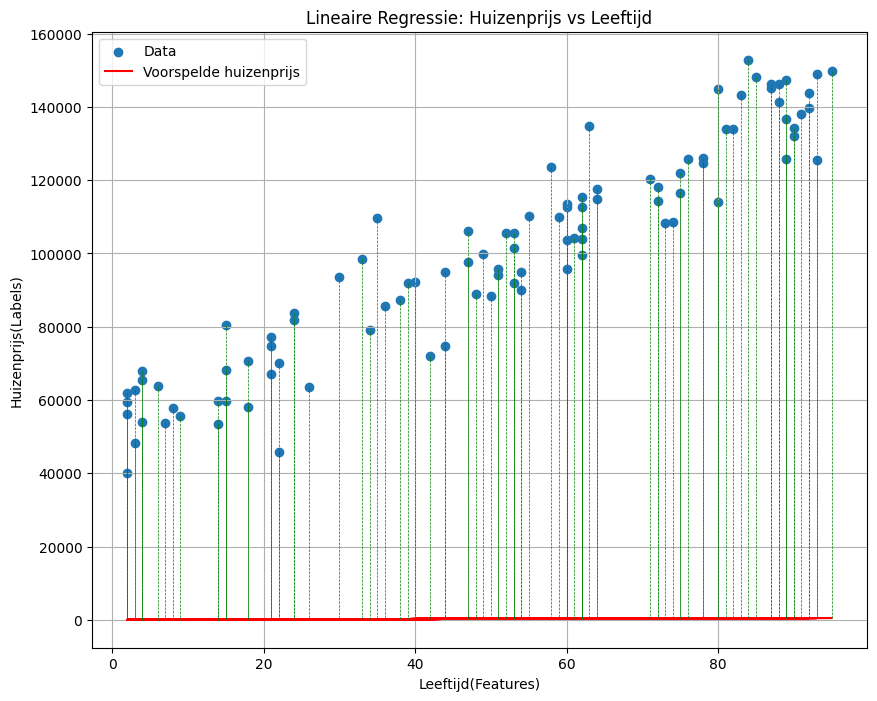

In [ ]:
# @title Niet goed getriand model (probleem)
# @markdown Elke groene stippellijn toont de afstand tussen een datapunt en de regressielijn, wat aangeeft hoeveel het model afwijkt van de werkelijke huizenprijs voor dat specifieke bouwjaar. Het doel van lineaire regressie is om deze afwijkingen te minimaliseren door de optimale waarden voor de gewichten (slope) en intercept (bias) te vinden, waardoor de regressielijn zo goed mogelijk past bij de gegevenspunten.
import numpy as np
import matplotlib.pyplot as plt

# Functie om lineaire regressie uit te voeren
def perform_linear_regression(bouwjaar, huizenprijs, weight, bias):
    y_pred = bias + weight * bouwjaar
    return y_pred

# Bereken de optimale waarden voor weight en bias
X = bouwjaar
y = huizenprijs
X_mean = np.mean(X)
y_mean = np.mean(y)
numerator = np.sum((X - X_mean) * (y - y_mean))
denominator = np.sum((X - X_mean) ** 2)


# Voer lineaire regressie uit
predicted_prices = perform_linear_regression(bouwjaar, huizenprijs, weight, bias)

# Plot de resultaten met de afstanden tussen datapunten en regressielijn
plt.figure(figsize=(10, 8))
plt.scatter(bouwjaar, huizenprijs, label='Data')
plt.plot(bouwjaar, predicted_prices, color='red', label='Voorspelde huizenprijs')
for i in range(len(bouwjaar)):
    plt.plot([bouwjaar[i], bouwjaar[i]], [huizenprijs[i], predicted_prices[i]], color='green', linestyle='--', linewidth=0.5)
plt.xlabel('Leeftijd(Features)')
plt.ylabel('Huizenprijs(Labels)')
plt.title('Lineaire Regressie: Huizenprijs vs Leeftijd')
plt.legend()
plt.grid(True)
plt.show()


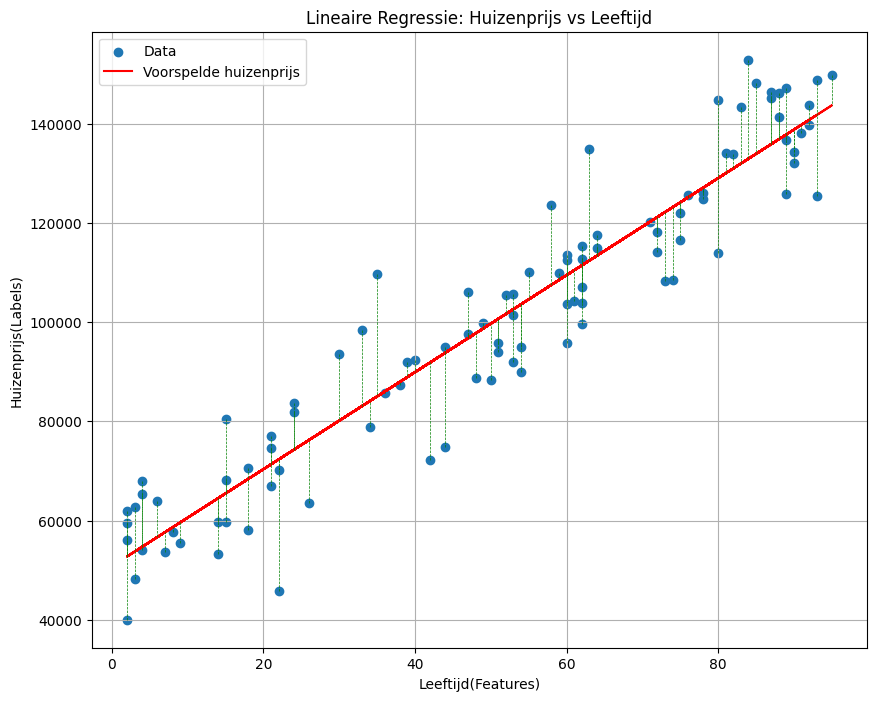

In [ ]:
# @title Beter getriand model (bereiking van het doel)
# @markdown Het doel van deze demonstratie is om te laten zien hoe een perfect getraind model de huizenprijzen nauwkeurig kan voorspellen op basis van het bouwjaar.
import numpy as np
import matplotlib.pyplot as plt

weight = numerator / denominator
bias = y_mean - weight * X_mean

# Functie om lineaire regressie uit te voeren
def perform_linear_regression(bouwjaar, huizenprijs, weight, bias):
    y_pred = bias + weight * bouwjaar
    return y_pred

# Bereken de optimale waarden voor weight en bias
X = bouwjaar
y = huizenprijs
X_mean = np.mean(X)
y_mean = np.mean(y)
numerator = np.sum((X - X_mean) * (y - y_mean))
denominator = np.sum((X - X_mean) ** 2)


# Voer lineaire regressie uit
predicted_prices = perform_linear_regression(bouwjaar, huizenprijs, weight, bias)

# Plot de resultaten met de afstanden tussen datapunten en regressielijn
plt.figure(figsize=(10, 8))
plt.scatter(bouwjaar, huizenprijs, label='Data')
plt.plot(bouwjaar, predicted_prices, color='red', label='Voorspelde huizenprijs')
for i in range(len(bouwjaar)):
    plt.plot([bouwjaar[i], bouwjaar[i]], [huizenprijs[i], predicted_prices[i]], color='green', linestyle='--', linewidth=0.5)
plt.xlabel('Leeftijd(Features)')
plt.ylabel('Huizenprijs(Labels)')
plt.title('Lineaire Regressie: Huizenprijs vs Leeftijd')
plt.legend()
plt.grid(True)
plt.show()


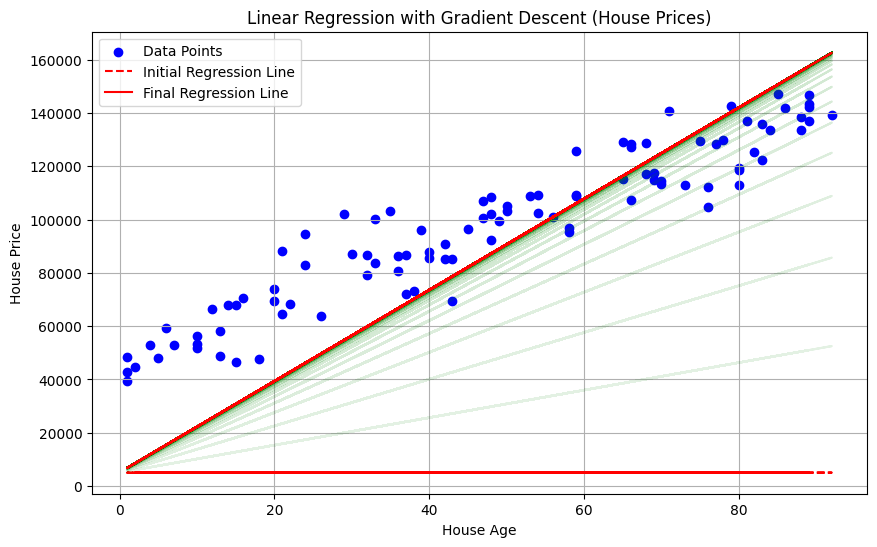

Loss waarbij weight en bias zijn geconvergeerd: 533529956.48488456


In [ ]:
# @title Gradient Descent in een lineare regressie
# @markdown Het doel van deze demonstratie is om te laten zien hoe Gradient Descent kan worden toegepast om een lineair regressiemodel te trainen en hoe het convergeert naar optimale gewichten en bias, waardoor nauwkeurige voorspellingen van huisprijzen mogelijk worden op basis van het bouwjaar. De groene lijn vertegenwoordigt de optimalisatieverbetering per iteratie. In de context van AI maken we gebruik van een neuraal netwerk in deep learning, een subcategorie van machine learning die onder andere wiskundige statistische methodes omvat.
import numpy as np
import matplotlib.pyplot as plt

# Genereer voorbeelddata: huizenprijzen en bouwjaar
np.random.seed(0)
num_samples = 100
house_age = np.random.randint(1, 100, num_samples)  # Bouwjaar van het huis
house_price = 50000 + 1000 * house_age + np.random.normal(0, 10000, num_samples)  # Prijs van het huis

# Definieer de initiële waarden voor gewicht (helling) en bias (afsnijding)
w = 0.5
b = 5000

# Definieer de leersnelheid en het aantal epochs
learning_rate = 0.00005
epochs = 100

# Lijsten om de geschiedenis van gewicht, bias en verlies op te slaan
w_history = [w]
b_history = [b]
loss_history = []

# Voer gradient descent uit
for epoch in range(epochs):
    # Voorspelde labels met behulp van huidig gewicht en bias
    predicted_prices = w * house_age + b

    # Bereken MSE-verlies
    mse_loss = np.mean((house_price - predicted_prices) ** 2)
    loss_history.append(mse_loss)

    # Update gewicht en bias met behulp van de regel voor gradiëntafdaling
    dw = (-2 / num_samples) * np.sum(house_age * (house_price - predicted_prices))
    db = (-2 / num_samples) * np.sum(house_price - predicted_prices)
    w = w - learning_rate * dw
    b = b - learning_rate * db

    # Voeg bijgewerkt gewicht en bias toe aan de geschiedenis
    w_history.append(w)
    b_history.append(b)

# Plot
plt.figure(figsize=(10, 6))

# Scatterplot van de datapunten (huizenprijs versus bouwjaar)
plt.scatter(house_age, house_price, color='blue', label='Data Points')

# Plot de initiële regressielijn
plt.plot(house_age, w_history[0] * house_age + b_history[0], color='red', linestyle='--', label='Initial Regression Line')

# Plot de bijgewerkte regressielijnen
for i in range(1, epochs+1, 1):  # Plot elke iteratie
    plt.plot(house_age, w_history[i] * house_age + b_history[i], color='green', alpha=0.1 + 0.9*i/epochs)

# Plot de uiteindelijke regressielijn
plt.plot(house_age, w_history[-1] * house_age + b_history[-1], color='red', label='Final Regression Line')

plt.xlabel('House Age')
plt.ylabel('House Price')
plt.title('Linear Regression with Gradient Descent (House Prices)')
plt.legend()
plt.grid(True)
plt.show()

# Bereken de loss met geconvergeerde weight en bias
converged_loss = loss_history[-1]
print("Loss waarbij weight en bias zijn geconvergeerd:", converged_loss)

###Loss functions voor object detectie

Om een machine learning model te trainen, worden voorbeelden gebruikt waarbij kenmerken worden gekoppeld aan de bijbehorende labels. Tijdens het trainen passen we de gewichten en biases aan om de labels nauwkeurig te voorspellen op basis van de kenmerken. Dit aanpassingsproces wordt geleid door lossfuncties, die het verschil tussen de werkelijke labels (output) en de voorspelde labels (output) meten. Dit verschil wordt de loss genoemd.



**Squared loss:**
Squared loss is een veelgebruikte loss function voor het trainen van modelen waaronder voor object detectie.

* Dit is een loss functie die de kwadratische afwijking tussen de voorspelde waarden en de werkelijke waarden meet. Het kwadrateert het verschil tussen de voorspelde waarde en de werkelijke waarde voor elk datapunt en telt deze kwadratische fouten vervolgens op.

  $(y - y')^2$

  **Het kwadraat wordt genomen om negatieve afwijkingen te neutraliseren en de focus te leggen op de grootte van de afwijking.**

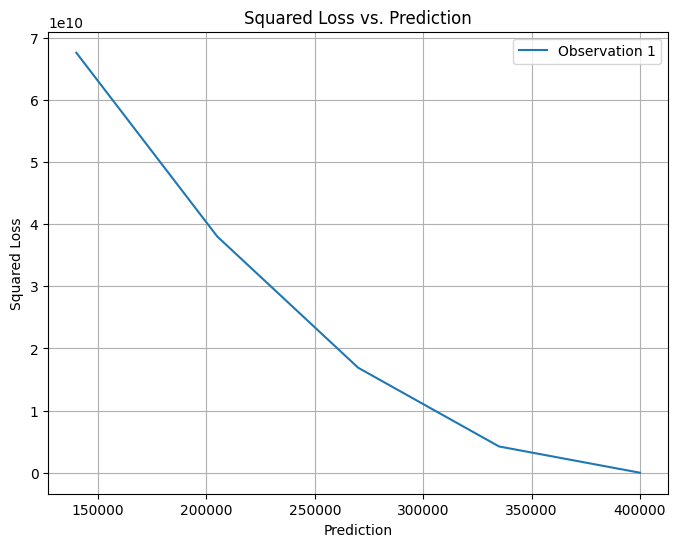

In [ ]:
# @title Voorbeeld squared loss met huisprijzen { display-mode: "both" }
import numpy as np
import matplotlib.pyplot as plt

# Voorbeelddata van huizenprijzen
observed_prices = np.array([400000])

# Genereer een reeks voorspelde prijzen
predicted_prices = np.linspace(140000, 400000, 5)

# Bereken het kwadratische verlies voor elke voorspelde prijs
squared_loss = np.square(observed_prices[:, np.newaxis] - predicted_prices)

# Plot het kwadratische verlies
plt.figure(figsize=(8, 6))
for i in range(len(observed_prices)):
    plt.plot(predicted_prices, squared_loss[i], label=f'Observation {i+1}')

plt.xlabel('Prediction')
plt.ylabel('Squared Loss')
plt.title('Squared Loss vs. Prediction')
plt.legend()
plt.grid(True)
plt.show()


Wat we uit de afbeelding kunnen afleiden, is dat naarmate de voorspelde waarden minder afwijken van de werkelijke waarden, de squared loss lager wordt. Dit fenomeen illustreert dat hoe kleiner de afstand tussen de voorspelde en werkelijke waarden is, hoe lager de resulterende loss zal zijn.

###Cost functions
Referentie: [loss functions in deep learning everything you need to know | brightbyte](https://brightbytee.medium.com/loss-functions-in-deep-learning-everything-you-need-to-know-2cd63fcc5478)

De gemiddelde loss over de gehele dataset. Het biedt inzicht in hoe goed een model presteert door de gemiddelde afwijking tussen de voorspelde en werkelijke waarden te meten.

**Mean Squared Error (MSE)**

De Mean Squared Error (MSE) is een maatstaf voor de gemiddelde kwadratische fout over alle datapunten in een dataset. Het wordt berekend door de som van de gekwadrateerde afwijkingen tussen de werkelijke waarden en de voorspelde waarden te nemen, en vervolgens te delen door het aantal datapunten in de dataset.

MSE = $$\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

$n$: Het aantal datapunten in de dataset. Wordt ook wel een batch genoemd. Als een batch 32 is dan is ${n}=32$.

$y_i$: De werkelijke waarde (of label) van het i-de voorbeeld.

$\hat{y}_i$: De voorspelde waarde voor het i-de voorbeeld, zoals berekend door het regressiemodel.

$\Sigma$: Het Griekse hoofdletter sigma staat voor sommatie. Dit symbool geeft aan dat we de volgende berekening uitvoeren voor elk voorbeeld $i$ in de dataset.

$\frac{1}{n}$: Deze factor normaliseert de som van de gekwadrateerde afwijkingen om het gemiddelde te berekenen. Het wordt gebruikt om de gemiddelde afwijking te bepalen over alle datapunten in de dataset.

$(y_i - \hat{y}_i)^2$: Dit is het gekwadrateerde verschil tussen de werkelijke waarde $y_i$ en de voorspelde waarde $\hat{y}_i$ voor elk voorbeeld $i$. Het kwadraat wordt genomen om negatieve afwijkingen te neutraliseren en de focus te leggen op de grootte van de afwijking.

In [ ]:
# @title Voorbeeld Squared Error met huisprijzen en bouwjaar op de train dataset { display-mode: "both" }
# Importeer de benodigde bibliotheken
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Voorbeelddata van woning features bouwjaar
features = np.array([[2010],
                     [2005],
                     [2000],
                     [1995],
                     [1990]])

# Bijbehorende labels voor de features om te trainen
labels = np.array([400000, 340000, 220000, 180000, 140000])

# Split de data in trainings- en testsets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

# Train het model met gelabelde voorbeelden
model = LinearRegression()
model.fit(X_train, y_train)

# Bereken de voorspelde prijzen voor de trainingsvoorbeelden
predicted_train_prices = model.predict(X_train)

# Bereken de squared loss voor elk trainingsvoorbeeld
squared_loss = (y_train - predicted_train_prices) ** 2

# Bereken de Mean Squared Error (MSE)
mse = np.mean(squared_loss)

print("Mean Squared Error (MSE) voor trainingsvoorbeelden:", mse)


Mean Squared Error (MSE) voor trainingsvoorbeelden: 497142857.14288586


In [ ]:
# @title Voorbeeld Squared Error met huisprijzen en bouwjaar op de test dataset { display-mode: "both" }
#Voorspel de prijzen voor de testvoorbeelden
predicted_test_prices = model.predict(X_test)

# Bereken het gekwadrateerde verschil tussen de voorspelde en werkelijke prijzen voor de testvoorbeelden

squared_losses_test = (y_train - predicted_train_prices) ** 2

# Bereken het gemiddelde van de gekwadrateerde verschillen
mean_squared_loss_test = np.mean(squared_losses_test)

# Print het gemiddelde van de gekwadrateerde fouten voor de testdata
print("Mean Squared Error (MSE) voor testvoorbeelden:", mean_squared_loss_test)


Mean Squared Error (MSE) voor testvoorbeelden: 497142857.14288586


**Cross-Entropy Loss**

Cross-entropy loss, ook wel log loss genoemd en wordt gebruikt voor classificatie, meet het verschil tussen de ontdekte waarschijnlijkheidsverdeling van een classificatiemodel en voorspelde waarden.

Cross-Entropy Loss = - $\frac{1}{n}$ $\cdot$ $\sum_{i=1}^{n}$ ($y_i$ $\cdot$ $\log(\hat{y}_i)$ + $(1 - y_i)$ $\cdot$ $\log(1 - \hat{y}_i)$)



$n$: Het aantal voorbeelden in de dataset.

$y_i$: De werkelijke klasse (of label) van het i-de voorbeeld.

$\hat{y}_i$: De voorspelde kans (of score) van de klasse voor het i-de voorbeeld, zoals berekend door het model.

$\log$: De natuurlijke logaritme. Logaritme wordt gebruikt om de mate van verschil tussen de werkelijke en voorspelde waarden te kwantificeren

De formule voor cross-entropy loss ziet er misschien ingewikkeld uit, maar laten we het stap voor stap bekijken:

1. Voor elk voorbeeld in de dataset berekenen we de cross-entropy loss.

2. We vergelijken de voorspelde kans ($\hat{y}_i$) van het model met de werkelijke klasse ($y_i$) van het voorbeeld.

3. Als de voorspelde kans overeenkomt met de werkelijke klasse, is het eerste deel van de formule ($y_i \cdot \log(\hat{y}_i)$) gelijk aan $\log(1) = 0$, wat betekent dat er geen loss is.

4. Als de voorspelde kans niet overeenkomt met de werkelijke klasse, wordt de loss groter. De mate van afwijking wordt bepaald door de natuurlijke logaritme ($\log$) van de voorspelde kans.

5. We nemen de som van deze afwijkingen voor alle voorbeelden in de dataset en delen deze door het aantal voorbeelden ($n$) om de gemiddelde cross-entropy loss te krijgen.


**Smooth L1 Loss (Huber Loss)**

Smooth L1 loss, ook wel bekend als Huber loss, wordt vaak gebruikt voor bounding box regression. Het is een alternatief voor de traditionele L2 loss (MSE) en is robuuster voor outliers. Het wordt berekend als:

Smooth L1 Loss = $\frac{1}{n} \sum_{i=1}^{n} \left\{
\begin{array}{ll}
0.5 \cdot x_i^2 & \text{if } |x_i| < 1 \\
|x_i| - 0.5 & \text{else}
\end{array} \right.$



Laten we de formule voor Smooth L1 loss eens nader bekijken:

1. Voor elk voorbeeld in de dataset wordt het verschil tussen de werkelijke en voorspelde waarden berekend ($x_i$).
2. Als de absolute waarde van dit verschil kleiner is dan 1, wordt de loss berekend als $0.5 \cdot x_i^2$. Dit is een kwadratische term die wordt gebruikt wanneer de fout klein is.
3.Als de absolute waarde van het verschil groter is dan of gelijk aan 1, wordt de loss berekend als $|x_i| - 0.5$. Dit is een lineaire term die wordt gebruikt wanneer de fout groot is.
4. De Smooth L1 loss voor elk voorbeeld wordt berekend volgens deze regels en vervolgens gemiddeld over alle voorbeelden in de dataset ($n$).

De som wordt genomen over alle voorbeelden in de dataset.
Smooth L1 loss wordt gebruikt om de fout te meten tussen de voorspelde en werkelijke bounding boxes, waarbij het de afstand tussen deze boxes berekent.



Phase 1: Train MSE: 428571428.57142323, Test MSE: 522448979.5919584
Phase 2: Train MSE: 428571428.57142323, Test MSE: 522448979.5919584
Phase 3: Train MSE: 428571428.57142323, Test MSE: 522448979.5919584
Phase 4: Train MSE: 428571428.57142323, Test MSE: 522448979.5919584
Phase 5: Train MSE: 428571428.57142323, Test MSE: 522448979.5919584
Phase 6: Train MSE: 428571428.57142323, Test MSE: 522448979.5919584
Phase 7: Train MSE: 428571428.57142323, Test MSE: 522448979.5919584
Phase 8: Train MSE: 428571428.57142323, Test MSE: 522448979.5919584
Phase 9: Train MSE: 428571428.57142323, Test MSE: 522448979.5919584
Phase 10: Train MSE: 428571428.57142323, Test MSE: 522448979.5919584
Phase 11: Train MSE: 428571428.57142323, Test MSE: 522448979.5919584
Phase 12: Train MSE: 428571428.57142323, Test MSE: 522448979.5919584
Phase 13: Train MSE: 428571428.57142323, Test MSE: 522448979.5919584
Phase 14: Train MSE: 428571428.57142323, Test MSE: 522448979.5919584
Phase 15: Train MSE: 428571428.57142323, Te

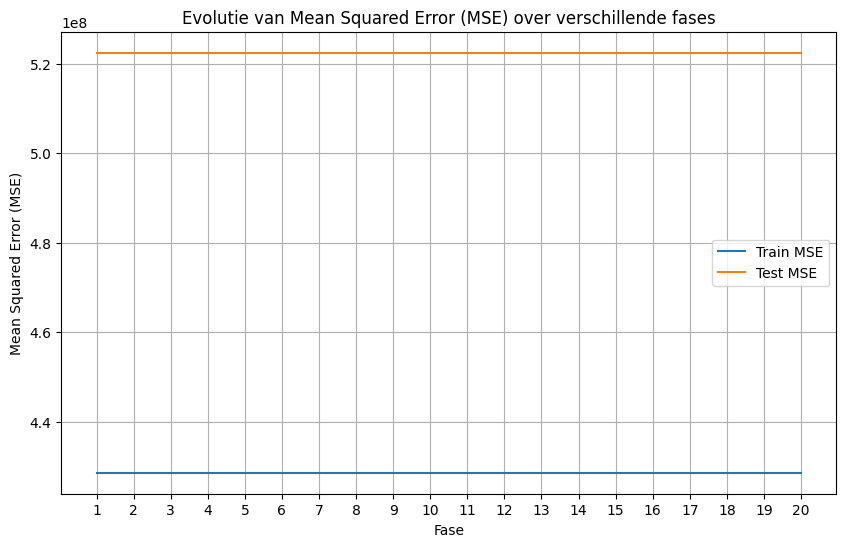

In [ ]:
# @title **Iteratie met Cost functions: Het streven naar een lager verlies** { display-mode: "both" }

# Definieer een lijst om de MSE-waarden op te slaan voor elke fase
train_mse_values = []
test_mse_values = []

# Loop over verschillende fases (bijv. verschillende epochs)
for phase in range(1, 21):  # Meer fases voor een beter zicht op de evolutie
    # Split de data in trainings- en testsets
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

    # Train het model met gelabelde voorbeelden
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Bereken de voorspelde prijzen voor de trainings- en testvoorbeelden
    predicted_train_prices = model.predict(X_train)
    predicted_test_prices = model.predict(X_test)

    # Bereken de Mean Squared Error (MSE) voor de trainings- en testvoorbeelden
    train_mse = np.mean((y_train - predicted_train_prices) ** 2)
    test_mse = np.mean((y_test - predicted_test_prices) ** 2)

    # Voeg de MSE-waarden toe aan de lijst voor visualisatie
    train_mse_values.append(train_mse)
    test_mse_values.append(test_mse)

    print(f"Phase {phase}: Train MSE: {train_mse}, Test MSE: {test_mse}")

# Visualiseer de evolutie van de MSE-waarden over de verschillende fases
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), train_mse_values, label='Train MSE')
plt.plot(range(1, 21), test_mse_values, label='Test MSE')
plt.xlabel('Fase')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Evolutie van Mean Squared Error (MSE) over verschillende fases')
plt.xticks(range(1, 21))
plt.legend()
plt.grid(True)
plt.show()


De weergave van de Mean Squared Error (MSE) over verschillende fases toont een rechte lijn omdat we momenteel een regressiemodel gebruiken dat niet in staat is om de loss te verminderen. In dit geval kan een lineair regressiemodel, zoals het model dat we momenteel gebruiken, alleen een lineaire relatie modelleren tussen de invoerkenmerken en de uitvoer, wat resulteert in een constante of geleidelijke MSE over verschillende trainingsfasen.



### Reducing loss

Om de loss te verminderen en het model te verbeteren, maken we onder andere gebruik van de Mean Squared Error (MSE) of een andere cost function. Dit stelt ons in staat om te bepalen hoe ver de voorspelde waarden van het model afwijken van de werkelijke waarden, waardoor we kunnen leren en optimaliseren. Hiervoor is een proces genaamd:








**Iterative trial-and-error process**

Het iteratief trial-and-error process is een herhaaldelijk acties worden uitgevoerd waarbij aanpassingen worden gedaan om het doel te behalen, de loss te verminderen en een accuraat model te trainen.

In een machine learning-context kan een iteratief trial-and-error proces worden toegepast bij het fine-tunen van hyperparameters, zoals weight, bias, leersnelheid, aantal iteraties, modelarchitectuur, enzovoort. Je past bijvoorbeeld een bepaalde set hyperparameters toe op je model, evalueert de prestaties ervan, past vervolgens de hyperparameters aan op basis van de resultaten, en herhaalt dit proces totdat je een optimale configuratie vindt die de gewenste resultaten oplevert.

Aan de hand van de onderdelen die aan de pas komen kunnen we begrijpen hoe gradient descent van toepassing is in dit process.

<img src="https://developers.google.com/static/machine-learning/crash-course/images/GradientDescentDiagram.svg" style="background-color: white;">

*Afbeelding: (Medium, [Iteratief trial-and-error process](https://edudzi-m.medium.com/ltg-losses-tensorflow-gradient-descent-4732d6f4bf2f))*


**1. Inference**

Het trainen van een model omvat het gebruik van gelabelde voorbeelden waarbij de features worden gekoppeld aan de corresponderende labels. Hierdoor kan het model de relatie tussen de features en de labels begrijpen en leren. Inference wordt uitgevoerd nadat het model is getraind, waarbij het model wordt toegepast op nieuwe data zonder labels om voorspellingen te genereren.

**2. Compute Loss**

Nadat de inference is uitgevoerd, wordt de output vergeleken met de werkelijke labelwaarden om de mate van afwijking, ofwel loss, te bepalen. Deze loss wordt berekend met behulp van lossfuncties, waarmee de prestaties van het model worden geëvalueerd.

**3. Compute parameter update**

Met de berekende loss kunnen we de parameters, zoals gewichten (w) en bias (b), aanpassen om het model te verbeteren. Dit proces van het bijwerken van parameters wordt uitgevoerd door methoden zoals gradient descent en backpropagation, waarbij de parameters iteratief worden aangepast om de loss te minimaliseren en de prestaties van het model te verbeteren.



Het leren en herhalen door iteraties, gaat door totdat het algoritme de modelparameters met het laagst mogelijke verlies ontdekt. Meestal herhaal je totdat het totale verlies niet meer verandert of op zijn minst extreem langzaam verandert. Wanneer dat gebeurt, zeggen we dat het model is **geconvergeerd**.

Om het iteratieve trial-and-error proces uit te voeren, zullen we de voorspelde waarden aanpassen door de bias (b) en de gewichten (w) van het model te optimaliseren, en vervolgens de loss te berekenen om de prestaties van het model te evalueren. Vervolgens gebruiken we optimalisatietechnieken om de bias en gewichten aan te passen om de loss te verminderen.

**Klik op play om alleen de output te zien.**

In [ ]:
# @title Reducing loss methoden, één iteratie

# Stel de initiële waarden van bias (b) en gewicht (w) in
b = 5 # Intercept
w = 100 # Slope

# Gegeven huis bouwjaar
year = 1993 # Feature/kenmerk/input (x)

# Maak een voorspelling met het model
y_pred = b + w * year

# Bereken de loss (squared loss)
y_true = 240000  # Laten we aannemen dat de werkelijke prijs $240,000 is
loss = (y_true - y_pred)**2

print("Initiële voorspelde prijs:", y_pred)
print("Loss:", loss)

# Optimalisatie - aanpassen van bias en gewicht om de loss te verminderen
learning_rate = 0.0000001  # Leerpercentage

# Bereken de afgeleiden van de loss met betrekking tot bias en gewicht
d_b = -2 * (y_true - y_pred) # verandering van een helling
d_w = -2 * year * (y_true - y_pred)

# Pas de bias en gewicht aan aan de hand van de veradnering van de helling
b = b - learning_rate * d_b
w = w - learning_rate * d_w

# Maak opnieuw een voorspelling met het geüpdatete model
y_pred = b + w * year

# Bereken de nieuwe loss
loss = (y_true - y_pred)**2

print("Daadwerkelijke prijs na optimalisatie:", y_true)
print("\nNa optimalisatie:")
print("Gewijzigde bias:", b)
print("Gewijzigd gewicht:", w)
print("Voorspelde prijs na optimalisatie:", y_pred)

print("Nieuwe loss na optimalisatie:", loss)


Initiële voorspelde prijs: 199305
Loss: 1656083025

Na optimalisatie:
Gewijzigde bias: 5.008139
Gewijzigd gewicht: 116.22102699999999
Voorspelde prijs na optimalisatie: 231633.51494999998
Nieuwe loss na optimalisatie: 69998072.0918738


Met slechts één iteratie blijft de loss nog hoog omdat het model nog niet genoeg tijd heeft gehad om te convergeren naar het optimale punt. Een enkele iteratie van optimalisatie is vaak niet voldoende om de loss significant te verminderen. Het kan nodig zijn om meerdere iteraties uit te voeren met geschikte aanpassingen van de bias en het gewicht om de loss aanzienlijk te verminderen en het model te verbeteren.

Iteratie 1: Voorspelde prijs = 238279.93433857049, Loss = 2958625.8796289545
Iteratie 2: Voorspelde prijs = 239646.3717006667, Loss = 125052.9740893625
Iteratie 3: Voorspelde prijs = 239927.29755794007, Loss = 5285.645081478013
Iteratie 4: Voorspelde prijs = 239985.05310493693, Loss = 223.40967202639496
Iteratie 5: Voorspelde prijs = 239996.92706784394, Loss = 9.44291203577694
Iteratie 6: Voorspelde prijs = 239999.36823587806, Loss = 0.39912590576518964
Iteratie 7: Voorspelde prijs = 239999.87011561418, Loss = 0.016869953680870072
Iteratie 8: Voorspelde prijs = 239999.9732970691, Loss = 0.0007130465180552098
Iteratie 9: Voorspelde prijs = 239999.99451014446, Loss = 3.0138513839678355e-05
Iteratie 10: Voorspelde prijs = 239999.9988713406, Loss = 1.2738720615359558e-06


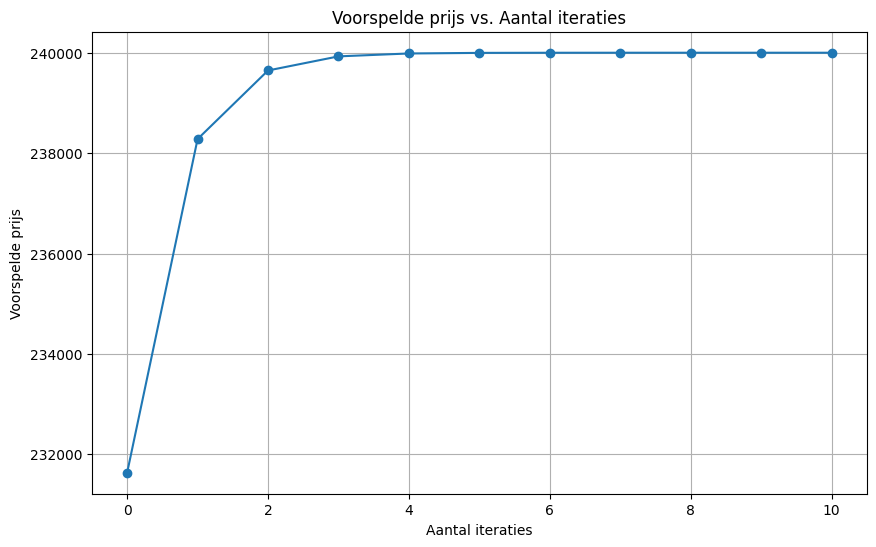

In [ ]:
# @title Reducing loss methoden iteratief, tien iteraties
import matplotlib.pyplot as plt

# Lijsten om de iteratie en de bijbehorende voorspelde prijs op te slaan
iterations = []
predicted_prices = []

# Voeg initiële voorspelde prijs toe
iterations.append(0)
predicted_prices.append(y_pred)

# Aantal iteraties voor de optimalisatie
num_iterations = 10

# Optimalisatie - aanpassen van bias en gewicht om de loss te verminderen
for i in range(1, num_iterations + 1):
    # Bereken de afgeleiden van de loss met betrekking tot bias en gewicht
    d_b = -2 * (y_true - y_pred)
    d_w = -2 * year * (y_true - y_pred)

    # Pas de bias en gewicht aan
    b = b - learning_rate * d_b
    w = w - learning_rate * d_w

    # Maak opnieuw een voorspelling met het geüpdatete model
    y_pred = b + w * year

    # Bereken de nieuwe loss
    loss = (y_true - y_pred)**2

    # Voeg de iteratie en bijbehorende voorspelde prijs toe aan de lijsten
    iterations.append(i)
    predicted_prices.append(y_pred)

    # Print de voorspelde prijs en loss voor elke iteratie
    print(f"Iteratie {i}: Voorspelde prijs = {y_pred}, Loss = {loss}")

# Plot de voorspelde prijs tegen het aantal iteraties
plt.figure(figsize=(10, 6))
plt.plot(iterations, predicted_prices, marker='o', linestyle='-')
plt.xlabel('Aantal iteraties')
plt.ylabel('Voorspelde prijs')
plt.title('Voorspelde prijs vs. Aantal iteraties')
plt.grid(True)
plt.show()


Naarmate we het iteratieve optimalisatieproces volgen, zien we dat de bias en gewichten geleidelijk worden aangepast om dichter bij de daadwerkelijke waarden te komen. Hierdoor convergeert het model geleidelijk naar een configuratie met lagere loss, wat resulteert in betere voorspellingen voor de prijs van het huis.

### Convexe cost functions

Laten we dieper ingaan op hoe we de bias en gewichten aanpassen om de optimale instellingen voor ons model te verkrijgen, wat resulteert in verbeterde voorspelde waarden.

Stel je een grafiek voor waarbij de y-as de loss vertegenwoordigt en de x-as de gewichten van ons model zijn. Met convexe loss functies creëren we een parabool bij het berekenen van de loss. Convexe functies zijn altijd bolvormig. We focussen nu op tweedimensionale convexe lossfuncties met één parameter, het gewicht.

Convexe functies, zoals een parabool, hebben slechts één globale minimum: een punt waar de helling precies nul is, wat zich visualiseert als een rechte horizontale lijn. Met dit punt, waar de lossfunctie minimaal is, kunnen we het convergentiepunt van het gewicht vinden voor de minimale loss.

Hier zijn twee voorbeelden van convexe loss functions die we kunnen bekijken.

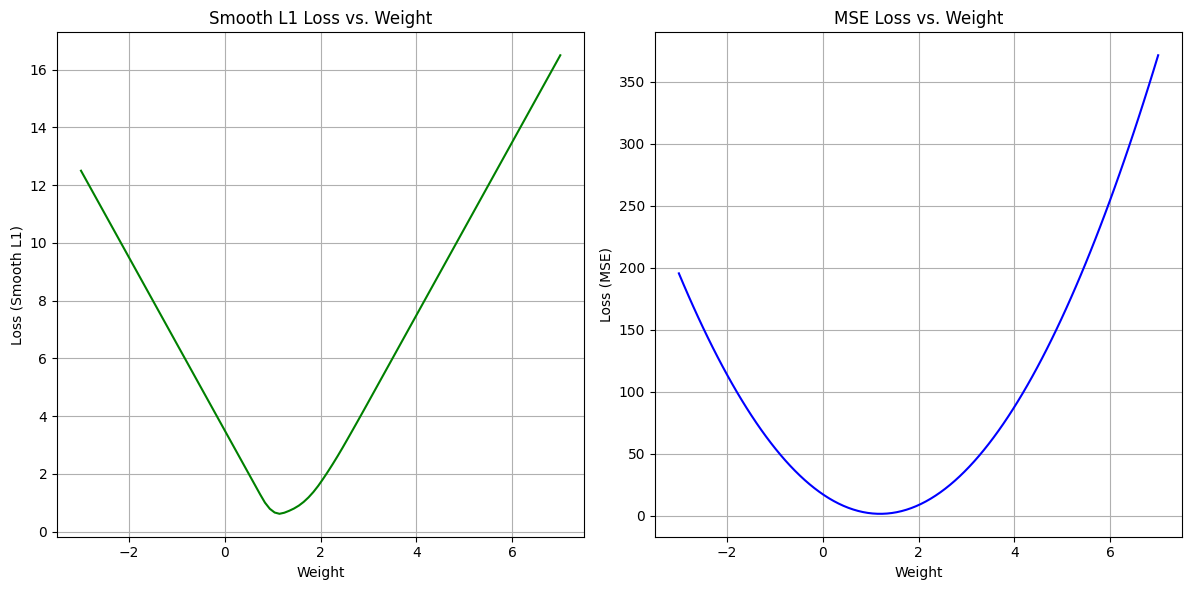

In [ ]:
# @title Convexe cost function surfaces, tweedimentionaal
import numpy as nps
import matplotlib.pyplot as plt

# Function to calculate Smooth L1 Loss
def smooth_l1_loss(true_labels, predicted_labels, delta=1.0):
    loss = np.where(np.abs(true_labels - predicted_labels) < delta,
                    0.5 * np.square(true_labels - predicted_labels),
                    delta * (np.abs(true_labels - predicted_labels) - 0.5 * delta))
    return np.mean(loss)

# Function to calculate Mean Squared Error (MSE)
def mean_squared_error(true_labels, predicted_labels):
    return np.mean((true_labels - predicted_labels) ** 2)


# Generate example data
X = np.array([1, 2, 3, 4, 5])  # Feature
Y = np.array([2, 4, 5, 4, 5])  # Labels

# Calculate Smooth L1, MSE, and Cross-Entropy Loss for different values of weight parameter
weights = np.linspace(-3, 7, 100)  # Range of weight values
smooth_l1_loss_vals = []
mse_loss = []
ce_loss = []

for w in weights:
    predicted_labels = w * X  # Predicted labels using current weight

    # Calculate Smooth L1 Loss
    smooth_l1 = smooth_l1_loss(Y, predicted_labels)
    smooth_l1_loss_vals.append(smooth_l1)

    # Calculate MSE
    mse = mean_squared_error(Y, predicted_labels)
    mse_loss.append(mse)


# Plot loss vs. weight for Smooth L1, MSE, and Cross-Entropy Loss
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.plot(weights, smooth_l1_loss_vals, color='green')
plt.title('Smooth L1 Loss vs. Weight')
plt.xlabel('Weight')
plt.ylabel('Loss (Smooth L1)')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(weights, mse_loss, color='blue')
plt.title('MSE Loss vs. Weight')
plt.xlabel('Weight')
plt.ylabel('Loss (MSE)')
plt.grid(True)

plt.tight_layout()
plt.show()


Wanneer een machine learning model gewichten en biases als parameters heeft, ontstaat er een oppervlaktegrafiek van de loss functions in drie dimensies. Deze grafiek ontstaat door alle mogelijke combinaties van gewichten en biases te doorlopen en de bijbehorende loss waarden te bekijken.

Hieronder is een visualisatie van een convexe loss functions met de parameters gewicht en bias.

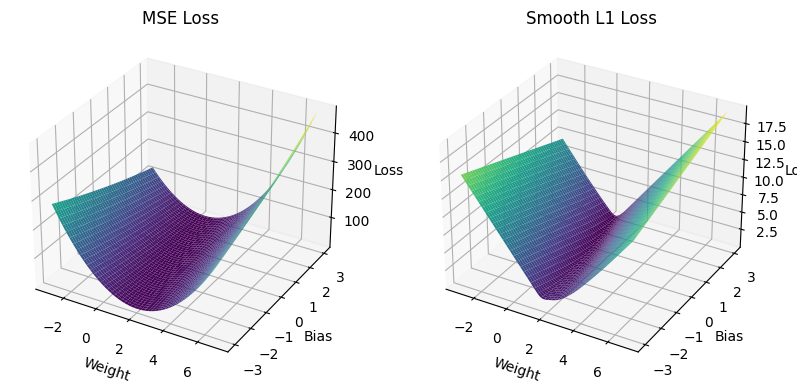

In [ ]:
# @title Cost functie surface, driedementionaal
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to calculate Mean Squared Error (MSE)
def mean_squared_error(true_labels, predicted_labels):
    return np.mean((true_labels - predicted_labels) ** 2)

# Function to calculate Smooth L1 Loss
def smooth_l1_loss(true_labels, predicted_labels, delta=1.0):
    error = np.abs(true_labels - predicted_labels)
    loss = np.where(error < delta, 0.5 * error ** 2, delta * (error - 0.5 * delta))
    return np.mean(loss)

# Generate example data
X = np.array([1, 2, 3, 4, 5])  # Feature
Y = np.array([2, 4, 5, 4, 5])  # Labels

# Define ranges for weight and bias
weights = np.linspace(-3, 7, 100)  # Range of weight values
biases = np.linspace(-3, 3, 100)   # Range of bias values

# Initialize arrays to store loss values
mse_loss_values = np.zeros((len(weights), len(biases)))
smooth_l1_loss_values = np.zeros((len(weights), len(biases)))

# Calculate loss for different values of weight and bias
for i, w in enumerate(weights):
    for j, b in enumerate(biases):
        predicted_labels = w * X + b  # Predicted labels using current weight and bias

        # Calculate MSE loss
        mse = mean_squared_error(Y, predicted_labels)
        mse_loss_values[i, j] = mse

        # Calculate Smooth L1 loss
        smooth_l1 = smooth_l1_loss(Y, predicted_labels)
        smooth_l1_loss_values[i, j] = smooth_l1

        # Sigmoid function to convert weights into probabilities
        predicted_probs = 1 / (1 + np.exp(-w * X))

# Create 3D plots
W, B = np.meshgrid(weights, biases)

fig = plt.figure(figsize=(15, 5))

# Plot MSE loss
ax1 = fig.add_subplot(131, projection='3d')
ax1.plot_surface(W, B, mse_loss_values.T, cmap='viridis')
ax1.set_title('MSE Loss')
ax1.set_xlabel('Weight')
ax1.set_ylabel('Bias')
ax1.set_zlabel('Loss')

# Plot Smooth L1 loss
ax2 = fig.add_subplot(132, projection='3d')
ax2.plot_surface(W, B, smooth_l1_loss_values.T, cmap='viridis')
ax2.set_title('Smooth L1 Loss')
ax2.set_xlabel('Weight')
ax2.set_ylabel('Bias')
ax2.set_zlabel('Loss')


plt.show()


Nu kunnen we zowel voor de bias als voor het gewicht de loss aflezen en zien waar de convexe loss function convergeert naar de optimale gewicht en bias.

### Non-Convexe cost functions


$f(x)=x
4
 −8x
2
 +5x
 $

Naast convexe loss functions zijn er ook non-convexe loss functions waarbij niet één globale minimum maar ook meerdere lokale minima. Dit kan leiden tot suboptimale resultaten omdat het optimalisatie-algoritme kan vastlopen in een lokaal minimum, wat niet het laagste punt is in de loss function. Dit kan de zoektocht naar het optimale punt bemoeilijken omdat het algoritme denkt dat het het minimum heeft bereikt.

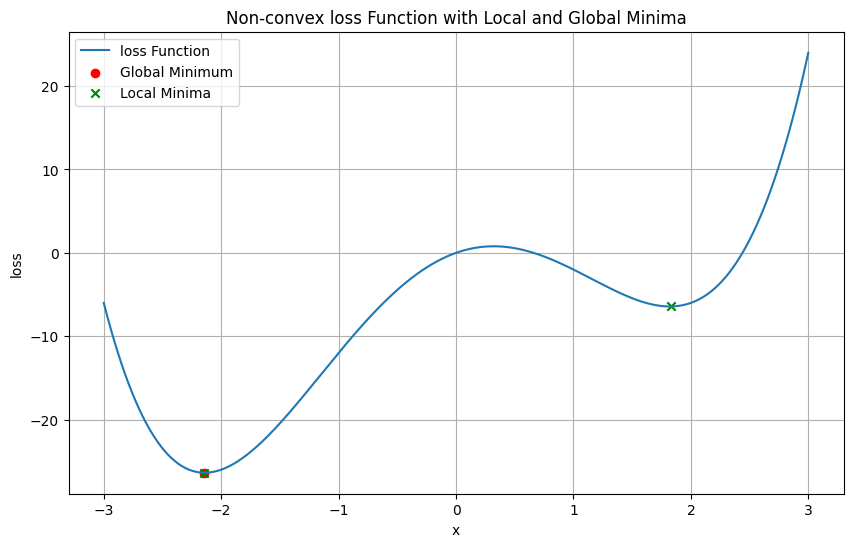

In [ ]:
# @title Non-convexe cost funtion met globale en lokale minimum
import numpy as np
import matplotlib.pyplot as plt

# Definieer de niet-convexe kostenfunctie
def loss_function(x):
    return x**4 - 8*x**2 + 5*x

# Genereer x-waarden voor de plot
x = np.linspace(-3, 3, 400)
y = loss_function(x)

# Vind de globale minimale en lokaal minimale punten
global_minimum = np.argmin(y)
local_minima = np.where(np.diff(np.sign(np.diff(y))) > 0)[0] + 1

# Plot de kostenfunctie
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='cost Function')
plt.scatter(x[global_minimum], y[global_minimum], color='r', marker='o', label='Global Minimum')
plt.scatter(x[local_minima], y[local_minima], color='g', marker='x', label='Local Minima')
plt.xlabel('x')
plt.ylabel('loss')
plt.title('Non-convex cost Function with Local and Global Minima')
plt.legend()
plt.grid(True)
plt.show()


####Zadel punt

$f(x,y)=x
^2
 −y
^2$


Een zadel punt in de context van functies verwijst naar een kritiek punt waarbij de partiële afgeleiden nul zijn, maar waar de richtingen van stijging en daling van de functie verschillen. Met andere woorden, een zadel punt is een punt waar de functie in sommige richtingen stijgt en in andere richtingen daalt, waardoor het lijkt op de vorm van een zadel.

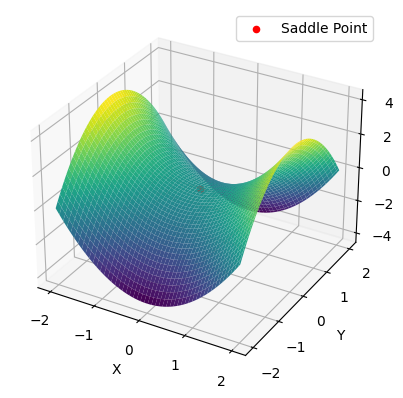

In [ ]:
# @title Zadelpunt
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definieer de zadeloppervlak functie
def saddle_surface(x, y):
    return x**2 - y**2

# Genereer x- en y-waarden voor de plot
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
Z = saddle_surface(X, Y)

# Plot de functie in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

# Markeer het zadel punt
ax.scatter(0, 0, saddle_surface(0, 0), color='r', marker='o', label='Saddle Point')

# Zet labels op de assen
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Voeg een legenda toe
plt.legend()

# Toon de plot
plt.show()


## Gradiënt

De gradiënt is een begrip uit de vectorcalculus dat nauw verwant is aan partiële afgeleiden. In wezen is de gradiënt een vector die de richting en de mate van de snelste toename van een functie aangeeft.

Als we een functie hebben van meerdere variabelen, bijvoorbeeld $f(x, y, z)$, dan is de gradiënt van $f$, genoteerd als $\nabla f$ of $\vec{\nabla} f$, een vector die wordt gevormd door de partiële afgeleiden van $f$ naar elke variabele. Voor een functie $f(x, y, z)$ is de gradiënt:

$\nabla f = \left( \frac{\partial f}{\partial x}, \frac{\partial f}{\partial y}, \frac{\partial f}{\partial z} \right)$

De gradiënt wijst in de richting van de grootste toename van de functie en zijn grootte geeft de snelheid van die toename aan. Met andere woorden, als je een kleine afstand beweegt in de richting van de gradiënt, zal de functiewaarde het snelst toenemen. De negatieve gradiënt wijst in de richting van de grootste afname van de functie.


###Afgeleide van een normale functie

Een afgeleide van een normale functie is een concept uit de differentiaalrekening, een tak van de wiskunde. Stel je voor dat je een functie hebt die een relatie beschrijft tussen twee variabelen, bijvoorbeeld
$y = f(x)$
. De afgeleide van deze functie, genoteerd als
$f'(x)$
 of
$\frac{dy}{dx}$
, geeft aan hoe snel de waarde van $y$ verandert ten opzichte van veranderingen in $x$.


In meer praktische termen vertelt de afgeleide ons de helling van de functie op een bepaald punt. Als de afgeleide positief is, betekent dit dat de functie stijgt op dat punt. Als de afgeleide negatief is, betekent dit dat de functie daalt. Als de afgeleide nul is, hebben we te maken met een extremum (een maximum of minimum) van de functie op dat punt.

### Partiële afgeleide

Een partiële afgeleide is een uitbreiding van het concept van de afgeleide naar functies met meerdere variabelen. In plaats van slechts één onafhankelijke variabele, zoals bij een normale afgeleide, hebben we nu te maken met een functie van meerdere variabelen, bijvoorbeeld $f(x, y)$ of $f(x, y, z)$.

Een partiële afgeleide geeft aan hoe snel de functie verandert met betrekking tot een specifieke variabele, terwijl alle andere variabelen constant worden gehouden. Stel bijvoorbeeld dat we een functie hebben die de temperatuur op een bepaald punt in een kamer beschrijft als een functie van de horizontale positie $x$ en de verticale positie $y$. De partiële afgeleide $\frac{\partial T}{\partial x}$ geeft dan aan hoe snel de temperatuur verandert wanneer we alleen de horizontale positie veranderen, terwijl $y$ constant blijft.


##Gradient Descent werking



Gradient descent berekent updates voor de parameters door de afgeleide van de cost functie te vermenigvuldigen met de learning rate. Deze afgeleide vertelt ons in welke richting en hoe snel we de parameters moeten aanpassen om de cost te verlagen. De learning rate bepaalt de grootte van de stap die we nemen bij elke update, waardoor het de snelheid en stabiliteit van het convergentieproces tijdens het trainen van het model beïnvloedt.

####Partiele afgeleiden berekenen Gradient Descent MSE

Brenninkmeijer, R., & Hardeman, A. (z.d.). GOochelen met kunstmatige intelligentie [Book]. In Hoofdstuk 1. Unknown. https://www.pyth.eu/uploads/default/g/o/goochelen-met-kunstmatige-intelligentie-raf-brenninkmeier-aron-hardeman.pdf

Laten we de formules voor de berekening van de partiële afgeleiden en de updatestappen in het gradient descent-algoritme toevoegen.

1. **Berekening van de partiële afgeleiden**:

  a. Voor de gewichtsparameter $ w $:
$$
\frac{\partial MSE}{\partial w} = -2 \cdot \frac{1}{N} \cdot \sum_{i=1}^{N} (y_{\text{true}}^{(i)} - y_{\text{pred}}^{(i)}) \cdot x^{(i)}
$$

 **Voor de gewichtsparameter $ w $**:
   - De partiële afgeleide $\ \frac{\partial MSE}{\partial w} \ $ geeft aan hoeveel de MSE verandert met een kleine verandering in $ (w) $.
   - We beginnen met het verschil tussen de voorspelde $ (y_{\text{pred}} )$ en de werkelijke $ (y_{\text{true}} ) $ waarden van het doelvariabele, vermenigvuldigd met de corresponderende waarde van de functie $ ( x ) $ voor elk voorbeeld.
   - We nemen het gemiddelde van deze producten voor alle voorbeelden $( \frac{1}{N} \cdot \sum_{i=1}^{N} (y_{\text{true}}^{(i)} - y_{\text{pred}}^{(i)}) \cdot x^{(i)} )$
   - Vermenigvuldigen met $\ -2 \$ maakt de afgeleide negatief en helpt bij het vinden van het minimum van de MSE.   
    
  b. Voor de intercept (bias) $ b $:
$$
\frac{\partial MSE}{\partial b} = -2 \cdot \frac{1}{N} \cdot \sum_{i=1}^{N} (y_{\text{true}}^{(i)} - y_{\text{pred}}^{(i)})
$$

 **Voor de intercept (bias) $ b $**:
   - De partiële afgeleide $\ \frac{\partial MSE}{\partial b} \ $ berekent de verandering in de MSE met een kleine verandering in $\ ( b )\ $.
   - Het verschil tussen de voorspelde $ (\ y_{\text{pred}} )\ $ en de werkelijke $ (\ y_{\text{true}} )\ $  waarden wordt genomen, zonder vermenigvuldiging met $ x $, omdat $\ ( b) \ $ alleen de verticale verschuiving van de regressielijn vertegenwoordigt.
   - We nemen het gemiddelde van deze verschillen voor alle voorbeelden $ ( \frac{1}{N} \cdot \sum_{i=1}^{N} (y_{\text{true}}^{(i)} - y_{\text{pred}}^{(i)})  $.
   - Net als bij $  ( w ) $, vermenigvuldigen we met $ (-2)  $ om de afgeleide negatief te maken.

  Hier is \$ N \$
 het aantal voorbeelden, \$ y_{\text{true}}^{(i)} \$
 de werkelijke waarde van het \$ i \$-de voorbeeld, \$ y_{\text{pred}}^{(i)} \$ de voorspelde waarde voor het \$ i \$-de voorbeeld, en \$ x^{(i)} \$ de waarde van de functie (bijv. leeftijd van het huis) voor het \$ i \$-de voorbeeld.


2. **Gradient Descent Update**:

   a. Voor de gewichtsparameter $ w $:
$$ w \leftarrow w - \alpha \cdot \frac{\partial MSE}{\partial w} $$
    
  b. Voor de intercept (bias) $ b $:
$$ b \leftarrow b - \alpha \cdot \frac{\partial MSE}{\partial b} $$


Deze formules worden gebruikt om de parameters van het model te updaten tijdens het trainen met gradient descent, met als doel de Mean Squared Error (MSE) te minimaliseren.

//KAN MISSCHIEN WEG

We hebben nu de convexe en non-convexe cost functions gevisualiseerd en zijn bekend met het iteratieve trial-and-error proces waarbij we de cost kunnen verminderen door de parameters aan te passen in de compute parameters update. Laten we nu kijken naar gradient descent, dat de parameters daadwerkelijk update door de globale minimum te vinden.

In het iteratieve proces van gradient descent passen we herhaaldelijk de parameters, gewicht en bias, aan om de cost function te minimaliseren. Door de huidige parameters te evalueren en de afgeleiden van de cost function te berekenen, bepalen we de richting en de hoeveelheid waarmee we de parameters moeten aanpassen. In een lineare regressie kunnen we dit zien door de y-intercept die omhoog gaat en de slope die kantelt. Het doel is om de optimale parameterwaarden te vinden die leiden tot het laagst mogelijke verlies voor ons model.

Hierbij past gradient descent zich stapsgewijs aan naar het punt waar de parameters convergeren binnen de convexe cost function.

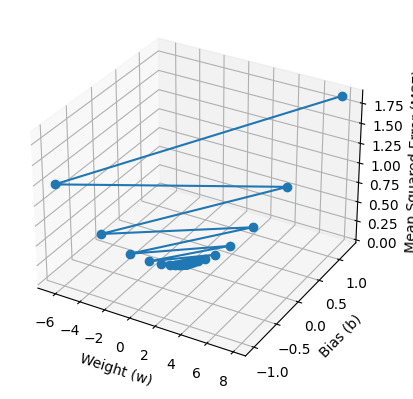

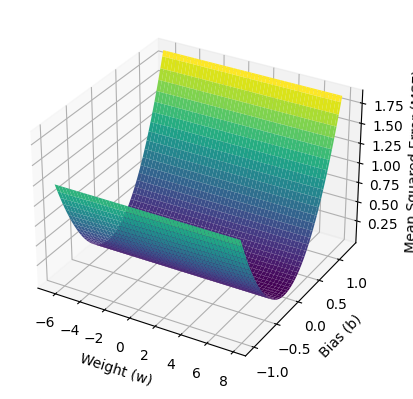

Converged values:
Weight (w): -9.690255164407553e+92
Bias (b): -1.5394736305984383e+91
Prediction Loss (MSE): 1.8718185681943465e+189


In [ ]:
# @title Gradient Descent met Mean Squared Error surface
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Bereken de MSE
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Bereken de voorspelling van ons model
def predict(x, w, b):
    return w * x + b

# Genereer de dummy data voor huisleeftijd en huisprijs
np.random.seed(0)
num_samples = 100
house_age = np.random.randint(1, 100, num_samples)  # Bouwjaar van het huis
house_price = 50000 + 1000 * house_age + np.random.normal(0, 10000, num_samples)  # Prijs van het huis

# Initialisatie van w en b
# Definieer de initiële waarden voor gewicht (helling) en bias (afsnijding)
w = 0.5
b = 5000
dw = 0
db = 0

# Lijsten om de MSE, w en b op te slaan tijdens het trainen
mse_values = []
w_values = []
b_values = []
dw_values = []
db_values = []

# Training met gradient descent
learning_rate =  0.00037
epochs = 1000

for epoch in range(epochs):
    y_pred = predict(house_age, w, b)
    mse_value = mse(house_price, y_pred)
    mse_values.append(mse_value)
    w_values.append(w)
    b_values.append(b)
    dw_values.append(dw)
    db_values.append(db)

    # Bereken de partiële afgeleiden
    dw = -2 * np.mean((house_price - y_pred) * house_age)
    db = -2 * np.mean(house_price - y_pred)

    # Update w en b
    w -= learning_rate * dw
    b -= learning_rate * db

# Plot de MSE in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(w_values, b_values, mse_values, marker='o')
ax.set_xlabel('Weight (w)')
ax.set_ylabel('Bias (b)')
ax.set_zlabel('Mean Squared Error (MSE)')

plt.show()

# Bereik van w en b
w_min, w_max = min(w_values), max(w_values)
b_min, b_max = min(b_values), max(b_values)

# Creëer een rooster van w- en b-waarden
num_points = 100
w_range = np.linspace(w_min, w_max, num_points)
b_range = np.linspace(b_min, b_max, num_points)
w_grid, b_grid = np.meshgrid(w_range, b_range)

# Bereken de MSE-waarden voor elk paar w en b
mse_surface = np.zeros_like(w_grid)
for i in range(len(w_range)):
    for j in range(len(b_range)):
        mse_surface[i, j] = mse(house_price, predict(house_age, w_range[i], b_range[j]))


# Plot de kostenoppervlakte in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(w_grid, b_grid, mse_surface, cmap='viridis')
ax.set_xlabel('Weight (w)')
ax.set_ylabel('Bias (b)')
ax.set_zlabel('Mean Squared Error (MSE)')
plt.show()

# Print de prediction loss samen met de geconvergeerde waarden van w en b
print("Converged values:")
print("Weight (w):", w)
print("Bias (b):", b)
print("Prediction Loss (MSE):", mse_values[-1])


####Learning rate

Wanneer we de afgeleide van de cost function berekenen, geeft deze ons de helling van de functie op dat punt. Een grote helling suggereert een steile helling, terwijl een kleine helling suggereert dat de functie vlakker is.

Door de leersnelheid te vermenigvuldigen met de afgeleide, bepalen we hoe groot de stap zal zijn bij het bijwerken van de parameters. Als de afgeleide groot is, betekent dit dat we steil afdalen op de helling, en een grote leersnelheid zou dan kunnen resulteren in te grote stappen, die mogelijk voorbij het optimale punt schieten. Daarom is het belangrijk om een passende leersnelheid te kiezen om het optimale punt effectief te kunnen benaderen.

Aan de andere kant, als de afgeleide klein is (wat betekent dat we ons dichter bij het optimale punt bevinden), zorgt een kleine leersnelheid ervoor dat we voorzichtiger zijn met onze updates, waardoor we dichter bij het optimale punt kunnen komen zonder er voorbij te schieten.



De leersnelheid initialiseren we zelf en kunnen we zien dat een te grote en een te kleine leersneleid niet optimaal is. Zie hierbij de volgende uitwerking

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
<ipython-input-83-b4938ac0c0fe>:8: RuntimeWarning: overflow encountered in square
  return np.mean((y_true - y_pred) ** 2)
/usr/local/lib/python3.10/dist-packages/mpl_toolkits/mplot3d/proj3d.py:180: RuntimeWarning: invalid value encountered in divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


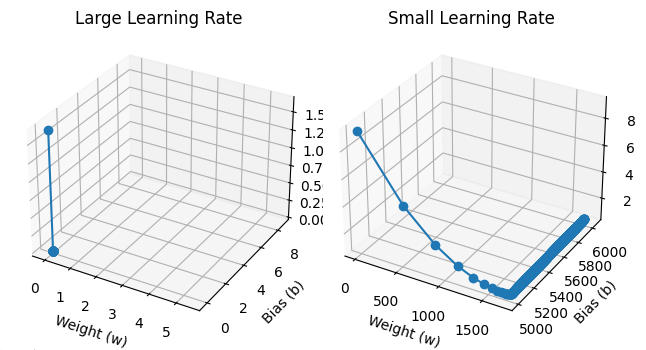

In [ ]:
# @title Grote vs kleine learning rate
# Grote leersnelheid
learning_rate_large = 0.01
epochs_large = 100

w_large = 0.5
b_large = 5000

mse_values_large = []
w_values_large = []
b_values_large = []

for epoch in range(epochs_large):
    y_pred_large = predict(house_age, w_large, b_large)
    mse_value_large = mse(house_price, y_pred_large)
    mse_values_large.append(mse_value_large)
    w_values_large.append(w_large)
    b_values_large.append(b_large)

    dw_large = -2 * np.mean((house_price - y_pred_large) * house_age)
    db_large = -2 * np.mean(house_price - y_pred_large)

    w_large -= learning_rate_large * dw_large
    b_large -= learning_rate_large * db_large

# Kleine leersnelheid
learning_rate_small = 0.00005
epochs_small = 1000

w_small = 0.5
b_small = 5000

mse_values_small = []
w_values_small = []
b_values_small = []

for epoch in range(epochs_small):
    y_pred_small = predict(house_age, w_small, b_small)
    mse_value_small = mse(house_price, y_pred_small)
    mse_values_small.append(mse_value_small)
    w_values_small.append(w_small)
    b_values_small.append(b_small)

    dw_small = -2 * np.mean((house_price - y_pred_small) * house_age)
    db_small = -2 * np.mean(house_price - y_pred_small)

    w_small -= learning_rate_small  * dw_small
    b_small -= learning_rate_small  * db_small

# Plot de MSE in 3D voor grote leersnelheid
fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
ax.plot(w_values_large, b_values_large, mse_values_large, marker='o')
ax.set_xlabel('Weight (w)')
ax.set_ylabel('Bias (b)')
ax.set_zlabel('Mean Squared Error (MSE)')
ax.set_title('Large Learning Rate')

# Plot de MSE in 3D voor kleine leersnelheid
ax = fig.add_subplot(122, projection='3d')
ax.plot(w_values_small, b_values_small, mse_values_small, marker='o')
ax.set_xlabel('Weight (w)')
ax.set_ylabel('Bias (b)')
ax.set_zlabel('Mean Squared Error (MSE)')
ax.set_title('Small Learning Rate')

plt.tight_layout()
plt.show()


Het lijkt erop dat de grote learning rate een overflow veroorzaakt, wat betekent dat de update-stap te groot is en de berekeningen numerieke problemen veroorzaken. Dit kan optreden als de learning rate te groot is in verhouding tot de afgeleiden van de parameters. Aan de andere kant lijkt de kleine learning rate te langzaam te convergeren en levert mogelijk geen optimale resultaten op binnen het aantal epochs.

####Relatie met backpropagation

In de context van backpropagation in neurale netwerken wordt de partiële afgeleide veel gebruikt om de richting en de mate van aanpassing van de gewichten en bias te bepalen tijdens de Compute parameter update. Backpropagation is een optimalisatie-algoritme dat wordt gebruikt om de parameters (gewichten en biases) van een neuraal netwerk aan te passen, zodat het de gewenste output kan produceren.

De relatie met zadel punten en lokale minimum komt voort uit het feit dat backpropagation gevoelig kan zijn voor de topologie van het cost function surface van het neurale netwerk. Als het cost function surface van het netwerk zadel punten of locale minimum bevat, kan dit leiden tot trage convergentie of zelfs tot het vastlopen van het optimalisatieproces. Daarom zijn strategieën zoals momentum, adaptieve leersnelheden en tweede-orde optimalisatie-algoritmen ontwikkeld om dit probleem aan te pakken en de prestaties van backpropagation te verbeteren, zelfs in de aanwezigheid van zadel punten.

##Problemen met Gradient Descent

In neurale netwerken, waar niet-lineaire activatiefuncties en meerdere lagen worden gebruikt, zijn de cost functions niet convex. Dit kan leiden tot het ontstaan van lokale minima en zadel punten. Als reactie hierop zijn verschillende methoden ontwikkeld, zoals het toevoegen van momentum aan gradient descent en het gebruik van zuinigere varianten van optimalisatiemethoden om deze obstakels te omzeilen.

###Cost function in een neural network



De Mean Squared Error (MSE) cost function wordt vaak gebruikt in neurale netwerken voor regressieproblemen. Op zichzelf is de MSE-functie een convexe functie, wat betekent dat er geen lokale minima behoren te zijn en dat een globaal minimum bestaat.

Echter, wanneer je een neuraal netwerk traint, worden de gewichten aangepast via optimalisatie-algoritmen zoals gradient descent. Tijdens dit proces kunnen er verstoringen optreden die de convexe aard van de MSE-functie kunnen verstoren. Dit kan te wijten zijn aan verschillende factoren, die eerder zijn benoemd

Het resultaat van deze verstoringen is dat het foutoppervlak van het neuraal netwerk niet meer volledig convexe is en lokale minima en zadel punten kan bevatten. Dit kan het trainingsproces bemoeilijken omdat het netwerk kan vastlopen in een lokaal minimum of moeite kan hebben om te ontsnappen aan een zadel punt.

Om deze problemen aan te pakken, worden verschillende technieken gebruikt, zoals het gebruik van betere optimalisatie-algoritmen, het toepassen van regulisatie om overfitting te verminderen, en het gebruik van batch normalisatie om het trainingsproces te stabiliseren.

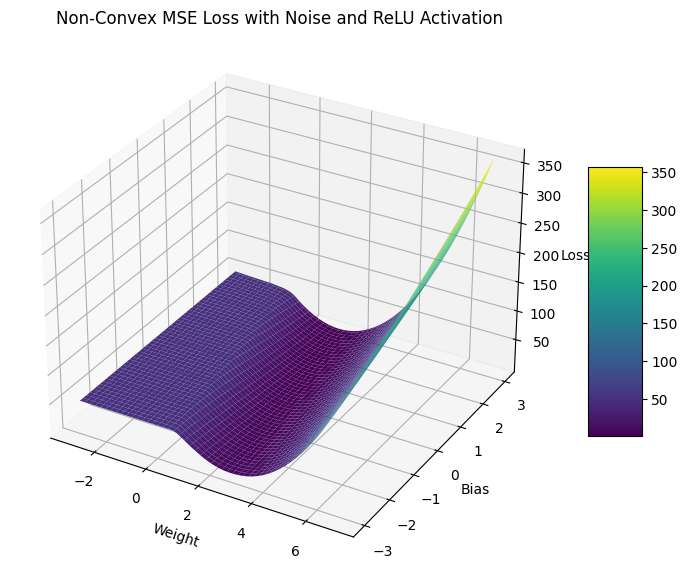

In [ ]:
# @title Convexe cost function naar Non-Convexe in neural network
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the ReLU activation function
def relu(x):
    return np.maximum(0, x)

# Function to calculate Mean Squared Error (MSE)
def mean_squared_error(true_labels, predicted_labels):
    return np.mean((true_labels - predicted_labels) ** 2)

# Generate example data
X = np.array([1, 2, 3, 4, 5])  # Feature
Y = np.array([2, 4, 5, 4, 5])  # Labels

# Define ranges for weight and bias
weights = np.linspace(-3, 7, 100)  # Range of weight values
biases = np.linspace(-3, 3, 100)   # Range of bias values

# Add random noise to the predicted labels
noise_std = 2
np.random.seed(0)
Y_with_noise = Y + np.random.normal(loc=0, scale=noise_std, size=Y.shape)

# Initialize arrays to store loss values
mse_loss_values = np.zeros((len(weights), len(biases)))

# Calculate loss for different values of weight and bias
for i, w in enumerate(weights):
    for j, b in enumerate(biases):
        predicted_labels = relu(w * X + b)  # Predicted labels using current weight and bias with ReLU activation
        mse = mean_squared_error(Y_with_noise, predicted_labels)
        mse_loss_values[i, j] = mse

# Create 3D plot
W, B = np.meshgrid(weights, biases)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot MSE loss
surf = ax.plot_surface(W, B, mse_loss_values.T, cmap='viridis')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
ax.set_title('Non-Convex MSE Loss with Noise and ReLU Activation')
ax.set_xlabel('Weight')
ax.set_ylabel('Bias')
ax.set_zlabel('Loss')


plt.show()


##Verbeterde optimalisatie
(TowardsScience, [Optimizers](https://towardsdatascience.com/understanding-deep-learning-optimizers-momentum-adagrad-rmsprop-adam-e311e377e9c2))



#### Momentum

Het versnellen van de convergentie kan worden bereikt door een momentumterm toe te voegen. De momentumterm is gebaseerd op de vorige weight updates en helpt het algoritme momentum op te bouwen terwijl het de cost function afdaalt. Momentum zorgt ervoor dat grotere stappen in de horizontale richting en kleinere stappen in de verticale richting worden genomen, wat resulteert in snellere convergentie.

Dankzij momentum kunnen we grotere stapgroottes gebruiken en de leersnelheid laag houden, waardoor we voorbij een zadelpunt of lokaal minimum kunnen gaan en naar een volgend punt kunnen schieten zonder een te hoge leersnelheid in te stellen. Dit vermindert de risico's bij het gebruik van grotere leersnelheden en versnelt het trainingsproces aanzienlijk.

**Momentum**:
$ v_t = \gamma v_{t-1} + \eta \nabla_{\theta} J(\theta) $

(encyclo, [cumulatief](https://www.encyclo.nl/begrip/cumulatief))
1. **$ v_t $**: Dit is de velocity (snelheid) op tijdstip $ t $. Het houdt de cumulatieve richting bij waarin de parameter $ \theta $ wordt aangepast. In essentie is dit de update term die wordt gebruikt om de parameter aan te passen.

2. **$ \gamma $**: Dit is de momentumcoëfficiënt. Het is een waarde tussen 0 en 1 die bepaalt hoeveel van de vorige velocity ($ v_{t-1} $) wordt meegenomen naar de huidige velocity ($ v_t $). Een hogere waarde van $ \gamma $ betekent dat de invloed van vorige updates sterker wordt meegenomen, wat zorgt voor een gladdere en stabielere update richting.

3. **$ v_{t-1} $**: Dit is de velocity op tijdstip $ t-1 $. Het is de velocity term van de vorige update stap.

4. **$ \eta $**: Dit is de learning rate. Het bepaalt de grootte van de stappen die worden genomen in de richting van de negatieve gradient.

5. **$ \nabla_\theta J(\theta) $**: Dit is de gradient van de cost funtion $ J(\theta) $ met betrekking tot de parameter $ \theta $. Het geeft de richting en de mate van verandering aan die nodig is om de cost function te minimaliseren.


1. **Momentum Term ($ \gamma v_{t-1} $)**:
   - Deze term zorgt ervoor dat een deel van de vorige updates behouden blijft. Het helpt om de updates in dezelfde richting te sturen als eerdere updates, waardoor schommelingen worden verminderd en het model sneller kan convergeren naar een minimum.

2. **Gradient Term ($ \eta \nabla_\theta J(\theta) $)**:
   - Deze term voegt de invloed van de huidige gradient toe aan de velocity. Dit zorgt ervoor dat het model blijft leren van de huidige fout en de parameters aanpast in de richting die de cost function vermindert.


**Normale Gradient Descent Update**:

   a. Voor de gewichtsparameter $ w $:
$$ w \leftarrow w - \alpha \cdot \frac{\partial MSE}{\partial w} $$
    
  b. Voor de intercept (bias) $ b $:
$$ b \leftarrow b - \alpha \cdot \frac{\partial MSE}{\partial b} $$


**Extra formule om momentum toe te voegen**

a. Voor de gewichtsparameter $ w $:

$$
\begin{align*}
v_w &\leftarrow \gamma \cdot v_w + \alpha \cdot \frac{\partial \text{MSE}}{\partial w} \\
w &\leftarrow w - v_w
\end{align*}
$$

b. Voor de intercept (bias)

$$
\begin{align*}
v_b &\leftarrow \gamma \cdot v_b + \alpha \cdot \frac{\partial \text{MSE}}{\partial b} \\
b &\leftarrow b - v_b
\end{align*}
$$

De term $ \alpha \cdot \frac{\partial \text{MSE}}{\partial w \of\ \partial b} $ kan worden gezien als de gradient richting, die aangeeft hoe de parameter moet worden aangepast op basis van de huidige fout. De term $ \gamma \cdot v_w $ kan worden gezien als de momentum richting, die de invloed van vorige updates in aanmerking neemt en de parameterupdate versoepelt en versnelt.




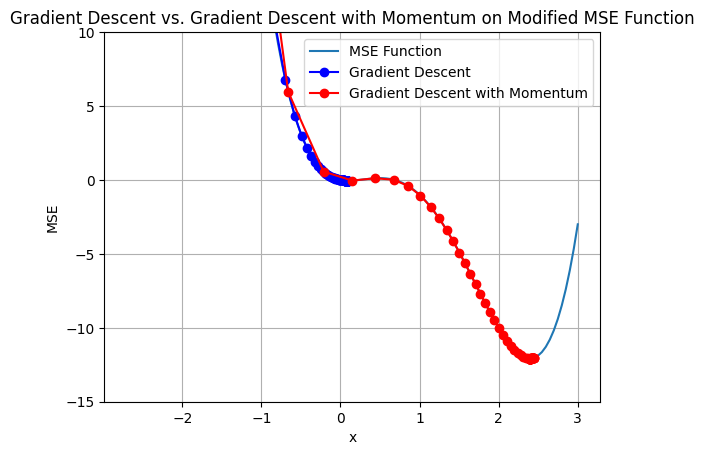

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definieer de aangepaste MSE-functie met een groter lokaal minimum
def mse(x):
    return 2*x**4 - 8*x**3 + 6*x**2 - x

# Bereken de gradient van de aangepaste MSE-functie
def mse_gradient(x):
    return 8*x**3 - 24*x**2 + 12*x - 1

# Implementeer Gradient Descent met Momentum
def gradient_descent_with_momentum(gradient_fn, lr=0.005, beta=0.9, num_iterations=100):
    x = -2.7  # Startwaarde dichter bij een lokale minimum
    v = 0  # initiële momentum
    trajectory = [x]

    for i in range(num_iterations):
        grad = gradient_fn(x)
        v = beta * v + (1 - beta) * grad
        x -= lr * v
        trajectory.append(x)

    return trajectory

# Implementeer standaard Gradient Descent zonder Momentum
def gradient_descent(gradient_fn, lr=0.005, num_iterations=100):
    x = -2.7  # Startwaarde dichter bij een lokale minimum
    trajectory = [x]

    for i in range(num_iterations):
        grad = gradient_fn(x)
        x -= lr * grad
        trajectory.append(x)

    return trajectory

# Visualiseer de MSE-functie en de trajectorieën van Gradient Descent met en zonder Momentum
x_values = np.linspace(-2, 3, 100)
y_values = mse(x_values)
plt.plot(x_values, y_values, label='MSE Function')

# Trajectorie van Gradient Descent zonder Momentum
trajectory_without_momentum = gradient_descent(mse_gradient, lr=0.005, num_iterations=100)
plt.plot(trajectory_without_momentum, [mse(x) for x in trajectory_without_momentum], '-o', color='blue', label='Gradient Descent')

# Trajectorie van Gradient Descent met Momentum
trajectory_with_momentum = gradient_descent_with_momentum(mse_gradient, lr=0.005, beta=0.8, num_iterations=100)
plt.plot(trajectory_with_momentum, [mse(x) for x in trajectory_with_momentum], '-o', color='red', label='Gradient Descent with Momentum')

plt.title('Gradient Descent vs. Gradient Descent with Momentum on Modified MSE Function')
plt.xlabel('x')
plt.ylabel('MSE')
plt.legend()
plt.ylim(-15, 10)  # Limit y-axis for better visualization
plt.grid(True)
plt.show()


Met momentum wordt een 'snelheid' of 'impuls' toegevoegd aan de update van de gewichten, gebaseerd op de vorige updates. Als de gradiënt in dezelfde richting blijft wijzen, zal de snelheid toenemen en zal de stap die wordt genomen in die richting groter zijn. Als de gradiënt echter van richting verandert, zal het momentum helpen om een deel van de snelheid te behouden en de update in de nieuwe richting te versnellen.

#### Adaptive Gradient Descent (Adagrad)

Adagrad staat voor Adaptive Gradient. Adagrad is een alternatief voor het standaard gradient descent algoritme en voegt een belangrijke eigenschap toe: een aanpasbare learning rate. Waar de learning rate in het momentum algoritme constant was, wordt de learning rate in het Adagrad algoritme dynamisch aangepast door de gradiënt mee te nemen in de berekening van de velociteit. De wortel van deze velociteit komt terug in een deling met de learning rate.

In plaats van een momentumcoëfficiënt te gebruiken zoals bij het momentum algoritme, past Adagrad de learning rate aan voor elke parameter op basis van hoe vaak deze is bijgewerkt. Parameters die vaak worden bijgewerkt, krijgen een lagere learning rate, terwijl parameters die minder vaak worden bijgewerkt, een hogere learning rate krijgen. Dit wordt bereikt door de learning rate te delen door de wortel van de eerder berekende velociteit, plus een kleine constante om deling door nul te voorkomen.

Door de learning rate afhankelijk te maken van de velocity en de voorgaande weights, wordt op een vergelijkbare manier als met momentum bepaald wanneer de stapgrootte kleiner moet worden. Echter, omdat momentum in deze berekening niet is meegenomen, blijft het zigzageffect dat te zien is bij normale gradient descent. Dit wordt opgelost in het RMSProp algoritme.

De formule van Adagrad ziet er als volgt uit:

$$
\begin{align*}
v_w &\leftarrow v_{w - 1} + \left( \frac{\partial \text{MSE}}{\partial w} \right)^2 \\
\end{align*}
$$

$$
w_{t} = w_{t - 1} - \frac{\alpha}{\sqrt{v_w} + \epsilon} \cdot \left( \frac{\partial \text{MSE}}{\partial w} \right) \\
$$

Waarbij:
- $ v_w $ de velociteit is die som van de voorgaande gekwadrateerde graidiënten voorstelt.
- $ \frac{\partial \text{MSE}}{\partial w} \\ $ de afgeleide is van de loss function en dus de gradiënt is.
- $ w_t $ het nieuw berekende gewicht is op basis van het oude gewicht $ w_{t - 1} $.
- $ \alpha $ de originele leersnelheid is.
- $ \epsilon $ een kleine waarde is (meestal rond $ 10^{-8} $) om deling door nul te voorkomen.

Door Adagrad toe te passen, zal de learning rate verkleind worden naarmate het gewicht dichter bij de optimale waarde komt. Omdat momentum in dit algoritme achterwege is gelaten, zullen de berekende tussenwaardes blijven fluctueren, aangezien er geen mate van richting is meegegeven. In de afbeelding hieronder is het pad te zien dat het Adagrad algoritme aflegt om bij een optimaal gewicht te komen:

<img src="https://miro.medium.com/v2/resize:fit:1100/format:webp/1*XRGG_PuIjc2jZMXpdblwPw.png">
<a href="https://towardsdatascience.com/understanding-deep-learning-optimizers-momentum-adagrad-rmsprop-adam-e311e377e9c2">Bron</a>

In onderstaand codefragment is een voorstelling van het Adagrad algoritme uitgeprogrammeerd en geplot in een grafiek.

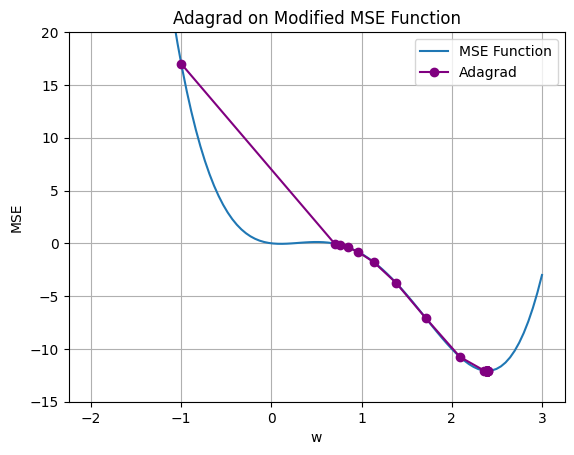

In [ ]:
# @title Adagrad implementatie op MSE loss functie
import numpy as np
import matplotlib.pyplot as plt

def adaptive_gradient(previous_velocity, previous_weight, iterations, learning_rate=1.7, epsilon=1e-8):
    trajectory = [previous_weight]
    for iteration in range(iterations):
        new_gradient = mse_gradient(previous_weight)
        new_velocity = previous_velocity + np.square(new_gradient)
        new_weight = previous_weight - learning_rate / (np.sqrt(new_velocity) + epsilon) * new_gradient
        trajectory.append(new_weight)
        previous_weight = new_weight
        previous_velocity = new_velocity
    return trajectory

def mse(input):
    return 2 * input ** 4 - 8 * input ** 3 + 6 * input ** 2 - input

def mse_gradient(input):
    return 8 * input ** 3 - 24 * input ** 2 + 12 * input - 1

def main():
    initial_weight = -1
    initial_velocity = 0
    iterations = 100

    x_values = np.linspace(-2, 3, 100)
    y_values = mse(x_values)
    plt.plot(x_values, y_values, label='MSE Function')

    trajectory_adagrad = adaptive_gradient(initial_velocity, initial_weight, iterations)
    plt.plot(trajectory_adagrad, [mse(w) for w in trajectory_adagrad], '-o', color='purple', label='Adagrad')

    plt.title('Adagrad on Modified MSE Function')
    plt.xlabel('w')
    plt.ylabel('MSE')
    plt.legend()
    plt.ylim(-15, 20)
    plt.grid(True)
    plt.show()

main()


Zoals te zien in de bovenstaande grafiek Adagrad-optimalisatiealgoritme past adaptief de learning rate aan op basis van historische gradients, waardoor het geschikt is voor verschillende delen van het parameterlandschap. Echter, het ontbreken van momentum in Adagrad kan het risico met zich meebrengen dat het algoritme vast komt te zitten in lokale minima, vooral in niet-convexe optimalisatieproblemen waar lokale minima overvloedig aanwezig zijn. Zie bijvoorbeeld de onderstaande grafiek:







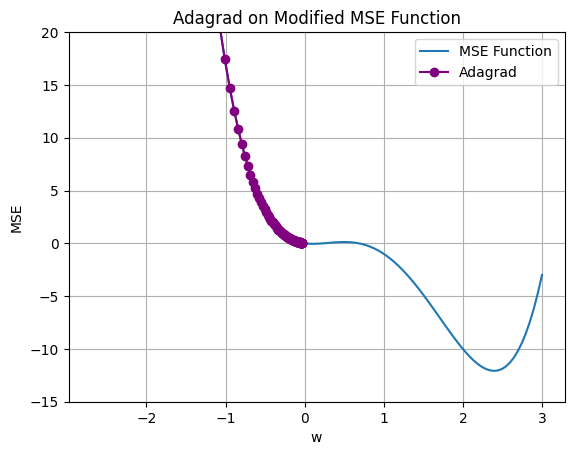

In [ ]:
# @title Adagrad implementatie - loopt vast op lokaal minimum
import numpy as np
import matplotlib.pyplot as plt

def adaptive_gradient(previous_velocity, previous_weight, iterations, learning_rate=0.65, epsilon=1e-8):
    trajectory = [previous_weight]
    for iteration in range(iterations):
        new_gradient = mse_gradient(previous_weight)
        new_velocity = previous_velocity + np.square(new_gradient)
        new_weight = previous_weight - learning_rate / (np.sqrt(new_velocity) + epsilon) * new_gradient
        trajectory.append(new_weight)
        previous_weight = new_weight
        previous_velocity = new_velocity
    return trajectory

def mse(input):
    return 2 * input ** 4 - 8 * input ** 3 + 6 * input ** 2 - input

def mse_gradient(input):
    return 8 * input ** 3 - 24 * input ** 2 + 12 * input - 1

def main():
    initial_weight = -2.7
    initial_velocity = 0
    iterations = 100

    x_values = np.linspace(-2, 3, 100)
    y_values = mse(x_values)
    plt.plot(x_values, y_values, label='MSE Function')

    trajectory_adagrad = adaptive_gradient(initial_velocity, initial_weight, iterations)
    plt.plot(trajectory_adagrad, [mse(w) for w in trajectory_adagrad], '-o', color='purple', label='Adagrad')

    plt.title('Adagrad on Modified MSE Function')
    plt.xlabel('w')
    plt.ylabel('MSE')
    plt.legend()
    plt.ylim(-15, 20)
    plt.grid(True)
    plt.show()

main()

In deze grafiek loopt het algoritme vast op een lokaal minimum. De parameters die zijn aangepast, zijn de learning rate (van 1.7 naar 0.65) en het initiële gewicht (van -1 naar -2.7). Om dit risico te verminderen, kunnen aanvullende technieken worden toegepast, zoals het toevoegen van momentum, het verkennen van verschillende startpunten, of het veranderen van het aantal iteraties. Het optimalisatiealgoritme Root Mean Square Propagation (RMSProp) zet de eerste stappen om dit probleem op te lossen.


####Root Mean Square Propagation (RMSProp)

Het past de leersnelheid adaptief aan op basis van de gemiddelde gradiënten van de parameters in plaats van alleen de weights. Als de gradiëntvlaktes zijn, wordt de leersnelheid verhoogd om sneller uit een lokale minimum te komen, en als de gradiënten steil zijn, wordt de leersnelheid minder verhoogd om de stabiliteit te behouden en te voorkomen dat het algoritme te snel over convergentie heen gaat. Dit adaptieve aanpassingsmechanisme van de leersnelheid maakt RMSProp robuuster en efficiënter bij het trainen van neurale netwerken in vergelijking met vaste leersnelheidsschema's.

**RMSprop Formule**:

Voor de gewichtsparameter $ w $:

$$
\begin{align*}
v_w &\leftarrow \gamma \cdot v_w + (1 - \gamma) \cdot \left( \frac{\partial \text{MSE}}{\partial w} \right)^2 \\
w &\leftarrow w - \frac{\alpha}{\sqrt{v_w + \epsilon}} \cdot \frac{\partial \text{MSE}}{\partial w}
\end{align*}
$$

Voor de intercept (bias) $ b $:

$$
\begin{align*}
v_b &\leftarrow \gamma \cdot v_b + (1 - \gamma) \cdot \left( \frac{\partial \text{MSE}}{\partial b} \right)^2 \\
b &\leftarrow b - \frac{\alpha}{\sqrt{v_b + \epsilon}} \cdot \frac{\partial \text{MSE}}{\partial b}
\end{align*}
$$

Waarbij:
- $ \gamma $ de decay parameter is die de mate van behoud van de eerdere gradientinformatie regelt.
- $ v_w $ en $ v_b $ de gewogen gemiddelde zijn van de kwadraten van de gradiënten.
- $ \alpha $ de leersnelheid is.
- $ \epsilon $ een kleine waarde is (meestal rond $ 10^{-8} $) om deling door nul te voorkomen.

RMSprop past de leersnelheid aan voor elke parameter door de wortel van het gewogen gemiddelde van de kwadraten van de gradiënten te nemen. Hierdoor worden grotere updates onderdrukt en kleinere updates versterkt, waardoor de stabiliteit van het optimalisatieproces wordt verbeterd en de convergentie wordt versneld.

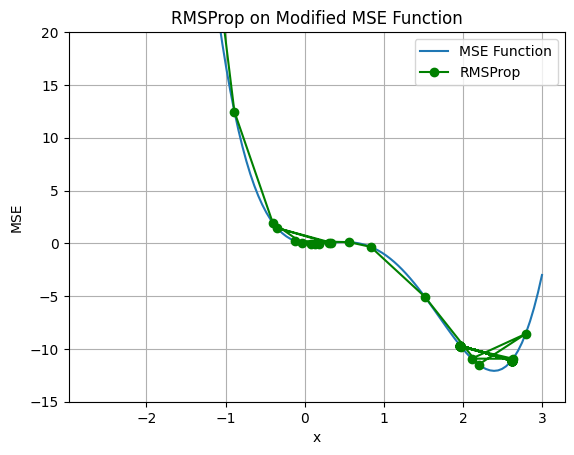

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definieer de aangepaste MSE-functie met een groter lokaal minimum
def mse(x):
    return 2*x**4 - 8*x**3 + 6*x**2 - x

# Bereken de gradient van de aangepaste MSE-functie
def mse_gradient(x):
    return 8*x**3 - 24*x**2 + 12*x - 1

# Implementeer RMSProp
def rmsprop(gradient_fn, lr, beta=0.9, epsilon=1e-8, num_iterations=100):
    x = -2.7  # Startwaarde dichter bij een lokale minimum
    cache = 0  # Initialize cache
    trajectory = [x]

    for i in range(num_iterations):
        grad = gradient_fn(x)
        cache = beta * cache + (1 - beta) * grad**2
        x -= lr * grad / (np.sqrt(cache) + epsilon)
        trajectory.append(x)

    return trajectory

# Visualiseer de MSE-functie en de trajectorie van RMSProp
x_values = np.linspace(-2, 3, 100)
y_values = mse(x_values)
plt.plot(x_values, y_values, label='MSE Function')

# Trajectorie van RMSProp
trajectory_rmsprop = rmsprop(mse_gradient, lr=0.65, beta=0.1, num_iterations=100)
plt.plot(trajectory_rmsprop, [mse(x) for x in trajectory_rmsprop], '-o', color='green', label='RMSProp')

plt.title('RMSProp on Modified MSE Function')
plt.xlabel('x')
plt.ylabel('MSE')
plt.legend()
plt.ylim(-15, 20)  # Limit y-axis for better visualization
plt.grid(True)
plt.show()


####Gradient descent variant - Stochastic Gradient

([Stochastich Proces](https://nl.wikipedia.org/wiki/Stochastisch_proces), Wikipedia) ([Stochastich proces](https://www.ecoboot.nl/tudelft/presan/node29.html), TU  Delft)

Het woord "stochastisch" verwijst naar het ontbreken van een specifiek patroon of volgorde bij het kiezen van een voorbeeld uit de batch, wat betekent dat de keuze van het voorbeeld niet deterministisch is maar afhankelijk is van toevallige uitkomsten.

In een machine learning-model dat gebruikmaakt van gradient descent, wordt vaak een batch, (groep) van voorbeelden gebruikt om de gradient in één iteratie te berekenen tijdens het trainen. Het voorbeeld in de code illustreert dit principe, waarbij een ideale minimum wordt gevonden binnen een vastgesteld aantal iteraties.

Stochastic gradient descent (SGD) is een oplossing om snellere iteraties te bereiken en energie te besparen, omdat het minder GPU-kracht vereist. In plaats van alle voorbeelden te gebruiken om de gradient te berekenen, selecteert SGD willekeurig voorbeelden uit de dataset. Per iteratie gebruikt SGD slechts één voorbeeld. Hoewel dit kan resulteren in een meer variabele schatting van de gradient, kan het toch convergeren naar een minimum van de kostfunctie, zij het met meer iteraties.

Hierbij een voorbeeld tussen het verschil van gradient descent en stochastic gradient descent

Kost na batch gradient descent: 396.38221351841145
Kost na stochastic gradient descent: 78.13833303963558


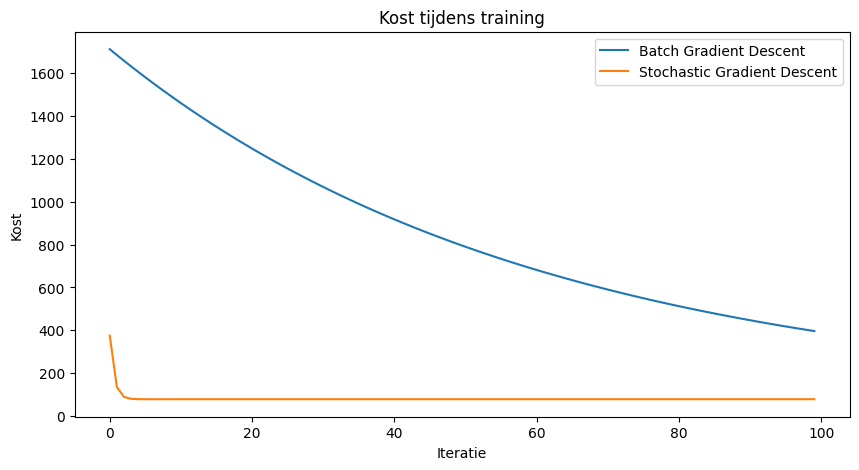

In [ ]:
# @title Stochastic Gradient
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import SGDRegressor, LinearRegression

# Genereer synthetische dataset voor lineaire regressie
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Functie om batch gradient descent uit te voeren
def batch_gradient_descent(X, y, learning_rate=0.01, num_iterations=100):
    # Initialiseer gewicht en bias
    w = np.random.randn(X.shape[1])
    b = np.random.randn()

    # Lijsten om de kost en gewichten bij te houden
    costs = []
    weights = []

    # Loop over het aantal iteraties
    for _ in range(num_iterations):
        # Bereken voorspelling
        y_pred = np.dot(X, w) + b

        # Bereken de gradient van de kostfunctie
        dw = (1 / len(X)) * np.dot(X.T, (y_pred - y))
        db = (1 / len(X)) * np.sum(y_pred - y)

        # Update gewicht en bias
        w -= learning_rate * dw
        b -= learning_rate * db

        # Bereken de kost en voeg toe aan de lijst
        loss = np.mean((y_pred - y) ** 2)
        costs.append(loss)
        weights.append((w, b))

    return costs, weights

# Functie om stochastic gradient descent uit te voeren
def stochastic_gradient_descent(X, y, learning_rate=0.01, num_epochs=100):
    # Initialiseer gewicht en bias
    w = np.random.randn(X.shape[1])
    b = np.random.randn()

    # Lijsten om de kost en gewichten bij te houden
    costs = []
    weights = []

    # Loop over het aantal epochs
    for _ in range(num_epochs):
        # Loop over elk voorbeeld
        for i in range(len(X)):
            # Voorspel voor één voorbeeld
            y_pred = np.dot(X[i], w) + b

            # Bereken de gradient van de kostfunctie voor één voorbeeld
            dw = X[i] * (y_pred - y[i])
            db = (y_pred - y[i])

            # Update gewicht en bias
            w -= learning_rate * dw
            b -= learning_rate * db

        # Bereken de kost en voeg toe aan de lijst
        loss = np.mean((np.dot(X, w) + b - y) ** 2)
        costs.append(loss)
        weights.append((w, b))

    return costs, weights

# Visualisatie van de kost tijdens het trainen
def plot_loss(costs_batch, costs_stochastic):
    plt.figure(figsize=(10, 5))
    plt.plot(range(len(costs_batch)), costs_batch, label='Batch Gradient Descent')
    plt.plot(range(len(costs_stochastic)), costs_stochastic, label='Stochastic Gradient Descent')
    plt.xlabel('Iteratie')
    plt.ylabel('Kost')
    plt.title('Kost tijdens training')
    plt.legend()
    plt.show()

# Voer batch gradient descent uit
costs_batch, _ = batch_gradient_descent(X, y)
print("Kost na batch gradient descent:", costs_batch[-1])

# Voer stochastic gradient descent uit
costs_stochastic, _ = stochastic_gradient_descent(X, y)
print("Kost na stochastic gradient descent:", costs_stochastic[-1])

# Plot de kost tijdens het trainen
plot_loss(costs_batch, costs_stochastic)


####Adam

Is een opbouwing van stochastic gradient descent met momentum en Root Mean Square Propagation (RMSP) gebruikt als optimalisatie.

##Conclusie

Door te onderzoeken naar gradient descent wat gebruikt wordt bij cost functies kunnen we zien dat convexe functies worden beinvloed door neurale netwerken dat ze niet convex worden. Dit beinlvoed de normale gradient descent omdat het stuk kan vallen op het lokale minimum maar dat kunnen we door gradient descent variaties en andere optimalisatie methodes oplossen.